In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

# Data

In [5]:
# Read data
motion_02 = np.genfromtxt('../dataset2/motion_02.csv', delimiter=',')
print("Motion 0.1 data has a length of ", len(motion_02))

Motion 0.1 data has a length of  126592


## Visualizations

In [6]:
"""
    Plot a 4x2 grid of comparing data.
"""
def plot_non_overlapping_data(dataset, data:list, idxs: list):
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(20,15))
    fig.suptitle('Heigh-Force (Idle)')

    ax1.plot(dataset[data[0], 0], dataset[data[0], idxs[0]], 'b-')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Height (FR)')

    ax2.plot(dataset[data[0], 0], dataset[data[0], idxs[1]], 'g-')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Force (FR)')

    ax3.plot(dataset[data[1], 0], dataset[data[1], idxs[2]], 'b-')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Height (FL)')

    ax4.plot(dataset[data[1], 0], dataset[data[1], idxs[3]], 'g-')
    ax4.set_xlabel('Time')
    ax4.set_ylabel('Force (FL)')

    ax5.plot(dataset[data[2], 0], dataset[data[2], idxs[4]], 'b-')
    ax5.set_xlabel('Time')
    ax5.set_ylabel('Height (RR)')

    ax6.plot(dataset[data[2], 0], datasetD[data[2], idxs[5]], 'g-')
    ax6.set_xlabel('Time')
    ax6.set_ylabel('Force (RR)')

    ax7.plot(dataset[data[3], 0], dataset[data[3], idxs[6]], 'b-')
    ax7.set_xlabel('Time')
    ax7.set_ylabel('Height (RL)')

    ax8.plot(dataset[data[3], 0], dataset[data[3], idxs[7]], 'g-')
    ax8.set_xlabel('Time')
    ax8.set_ylabel('Force (RL)')

    fig.tight_layout()

    plt.show()
 
"""
    Plot data on overlapping graph. 
"""
def plot_overlapping_data(title: str, dataset, data: list, idxs: list, draw_footsteps=None, footsteps_timestamp=None):
    fig, (ax1, ax3, ax5, ax7) = plt.subplots(4,1, figsize=(20,15))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(dataset[data[0], 0], dataset[data[0], idxs[0]], 'b-')
    ax1.set_ylabel('Height (FR)')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(dataset[data[0], 0], dataset[data[0], idxs[1]], 'g-')
    ax2.set_ylabel('Force (FR)', color='g')
          
    # FL plot (height)
    ax3.plot(dataset[data[1], 0], dataset[data[1], idxs[2]], 'b-')
    ax3.set_ylabel('Height (FL)')
    ax3.set_xlabel('Time')
         
    # FL plot (force)
    ax4 = ax3.twinx()
    ax4.plot(dataset[data[1], 0], dataset[data[1], idxs[3]], 'g-')
    ax4.set_ylabel('Force(FL)', color='g')      
          
    # RR plot (height)
    ax5.plot(dataset[data[2], 0], dataset[data[2], idxs[4]], 'b-')
    ax5.set_ylabel('Height (RR)')
    ax5.set_xlabel('Time')
         
    # RR plot (force)
    ax6 = ax5.twinx()
    ax6.plot(dataset[data[2], 0], dataset[data[2], idxs[5]], 'g-')
    ax6.set_ylabel('Force (RR)', color='g')   
          
    # RL plot (height)
    ax7.plot(dataset[data[3], 0], dataset[data[3], idxs[6]], 'b-')
    ax7.set_ylabel('Height (RL)')
    ax7.set_xlabel('Time')
         
    # RL plot (force)
    ax8 = ax7.twinx()
    ax8.plot(dataset[data[3], 0], dataset[data[3], idxs[7]], 'g-')
    ax8.set_ylabel('Force (RL)', color='g')

    for ax in [ax2, ax4, ax6, ax8]:
        for tl in ax.get_yticklabels():
            tl.set_color('g')
    
    # Draw footsteps
    if draw_footsteps:
        for ax in [ax1, ax3, ax5, ax7]:
            for footstep_timestamp in footsteps_timestamp:
                if footstep_timestamp <= max(dataset[data[0], 0]) and footstep_timestamp >= min(dataset[data[0], 0]):
                    #print("Timestamp: ", footstep_timestamp)
                    ax.axvline(x=footstep_timestamp, color='r', linestyle='-')
    
    fig.tight_layout()
    plt.show()

## Height-Force plots

In [7]:
"""
def get_specific_cmd(dataset, fwd, side, rot):
    return np.where(np.logical_and(dataset[:, 2] == fwd, 
                                   dataset[:, 3] == side, 
                                   dataset[:, 4] == rot))[0]
"""

def get_specific_cmd(dataset, fwd, side, rot):
    idxs = []
    for row_id, item in enumerate(dataset):
        if np.isclose(item[2], fwd, 0.01) and np.isclose(item[3], side, 0.01) and np.isclose(item[4], rot, 0.01):
            idxs.append(row_id)
    
    return idxs

In [8]:
def get_swinging_motions(dataset, height=-0.3):
    # FR min height (i.e swining motion)
    fr_min_height = np.where(dataset[:, 34] < height)[0]
    fl_min_height = np.where(dataset[:, 37] < height)[0]
    rr_min_height = np.where(dataset[:, 40] < height)[0]
    rl_min_height = np.where(dataset[:, 43] < height)[0]
            
    return fr_min_height,fl_min_height,rr_min_height,rl_min_height

## motion_02

In [9]:
velocity = 0.214359

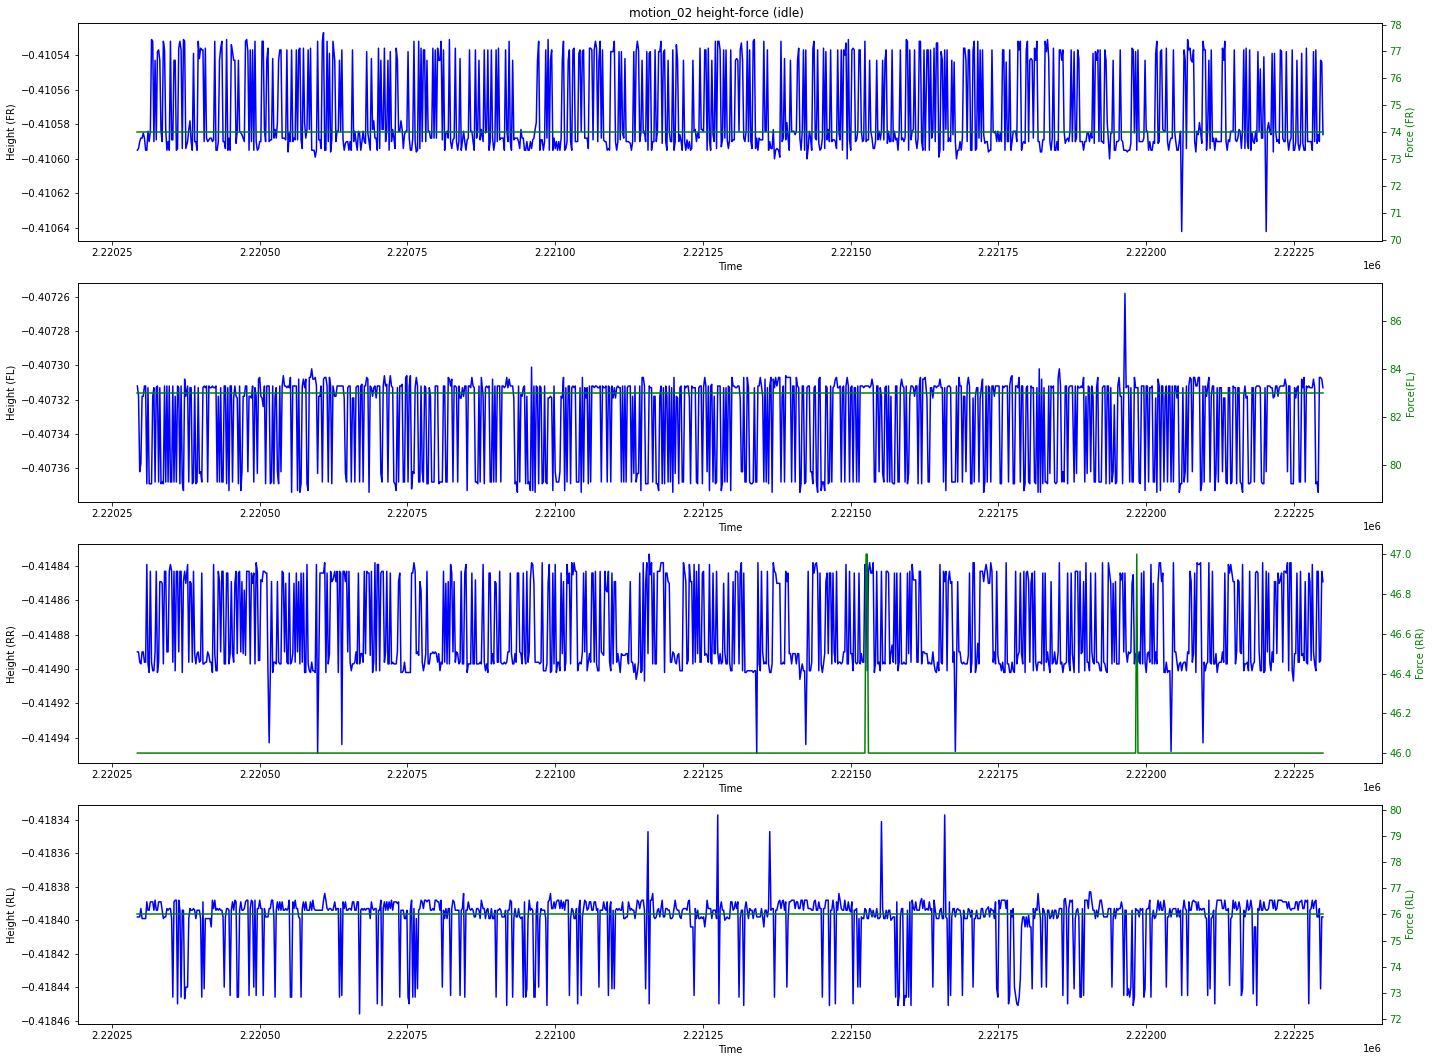

In [10]:
# Idle
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_02)

sample_walking_fr_height = fr_min_height[:1000]
sample_walking_fl_height = fl_min_height[:1000]
sample_walking_rr_height = rr_min_height[:1000]
sample_walking_rl_height = rl_min_height[:1000]

plot_overlapping_data("motion_02 height-force (idle)",
                      motion_02,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

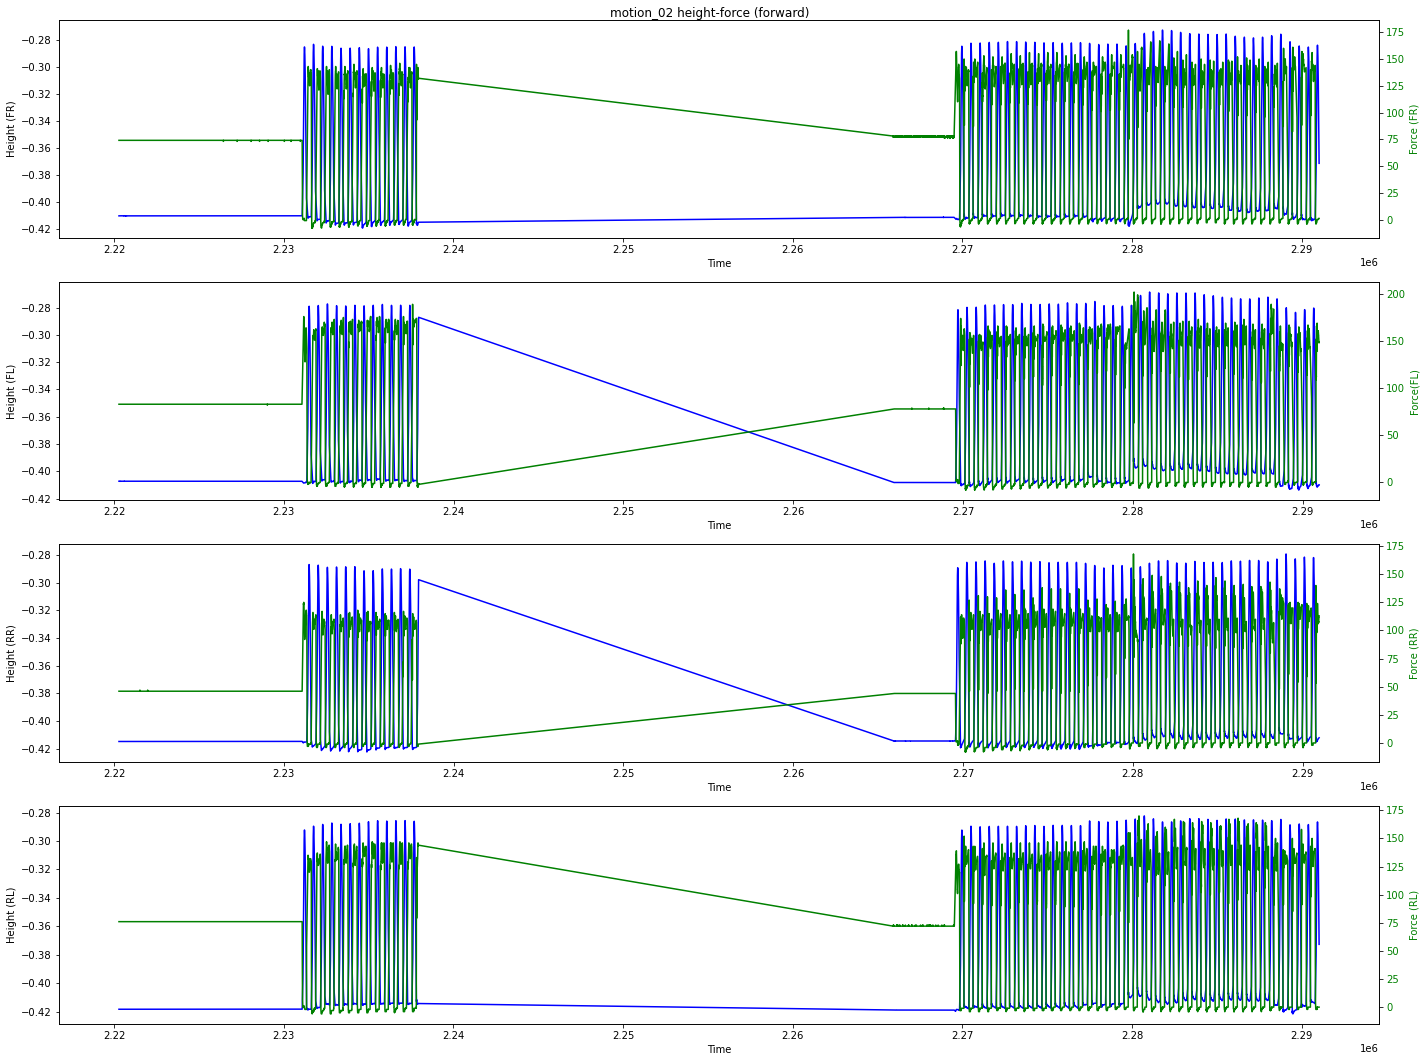

In [11]:
# Forward
fwd_cmds = get_specific_cmd(motion_02, velocity, 0, 0)
motion_02_fwd = motion_02[fwd_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_02_fwd)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_02 height-force (forward)",
                      motion_02,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

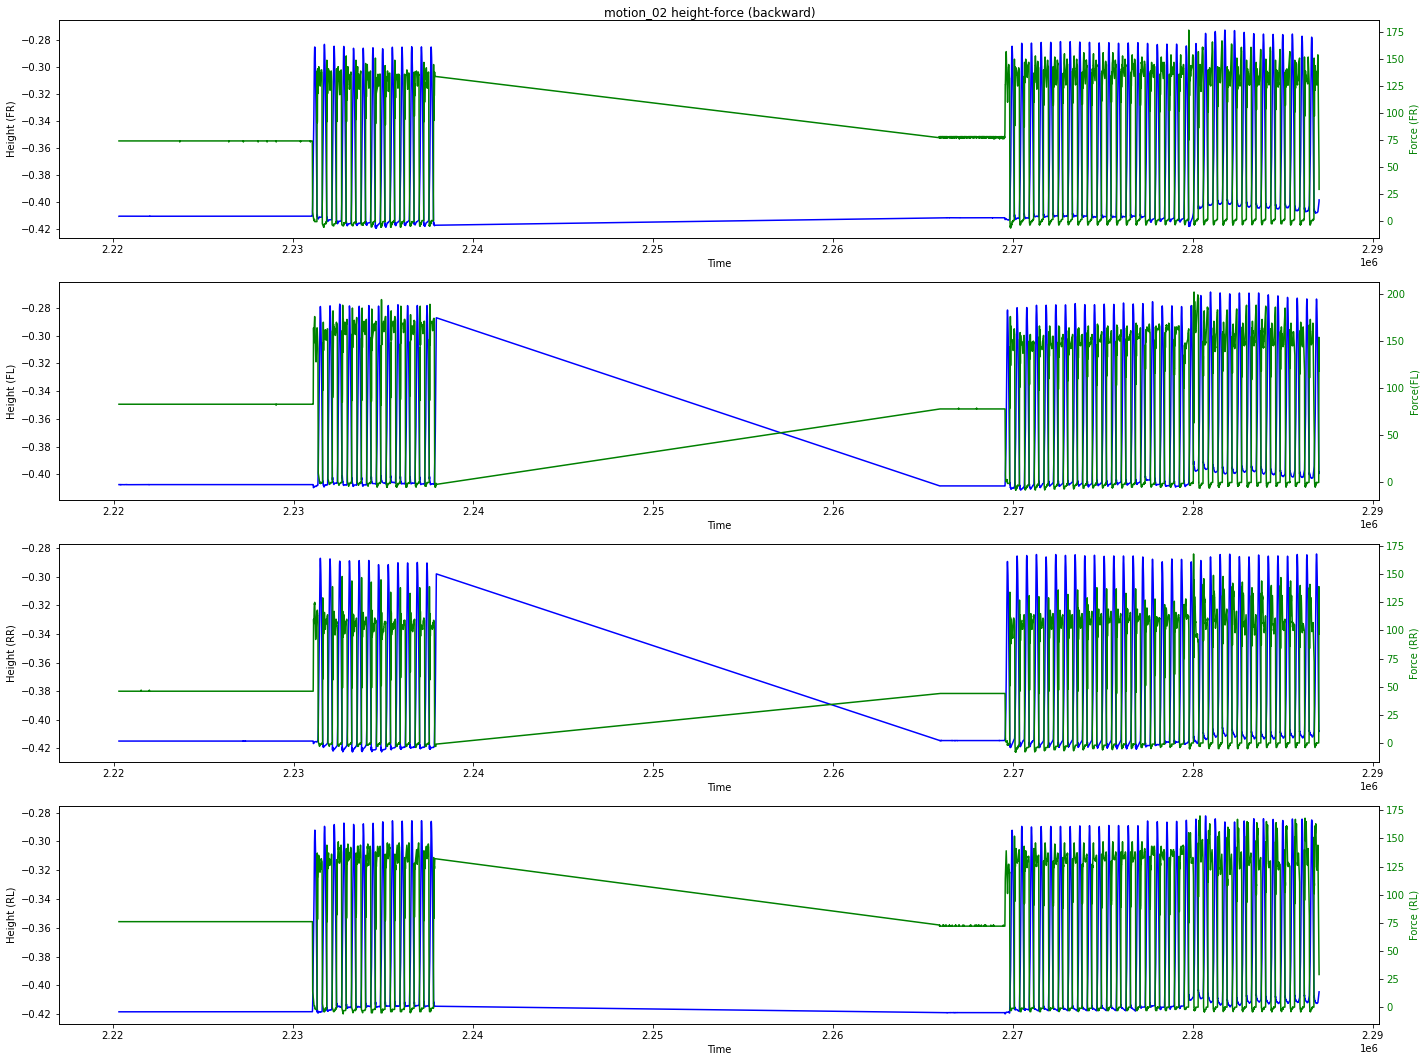

In [12]:
# Backwards
bwd_cmds = get_specific_cmd(motion_02, -velocity, 0, 0)
motion_02_bwd = motion_02[bwd_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_02_bwd)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_02 height-force (backward)",
                      motion_02,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

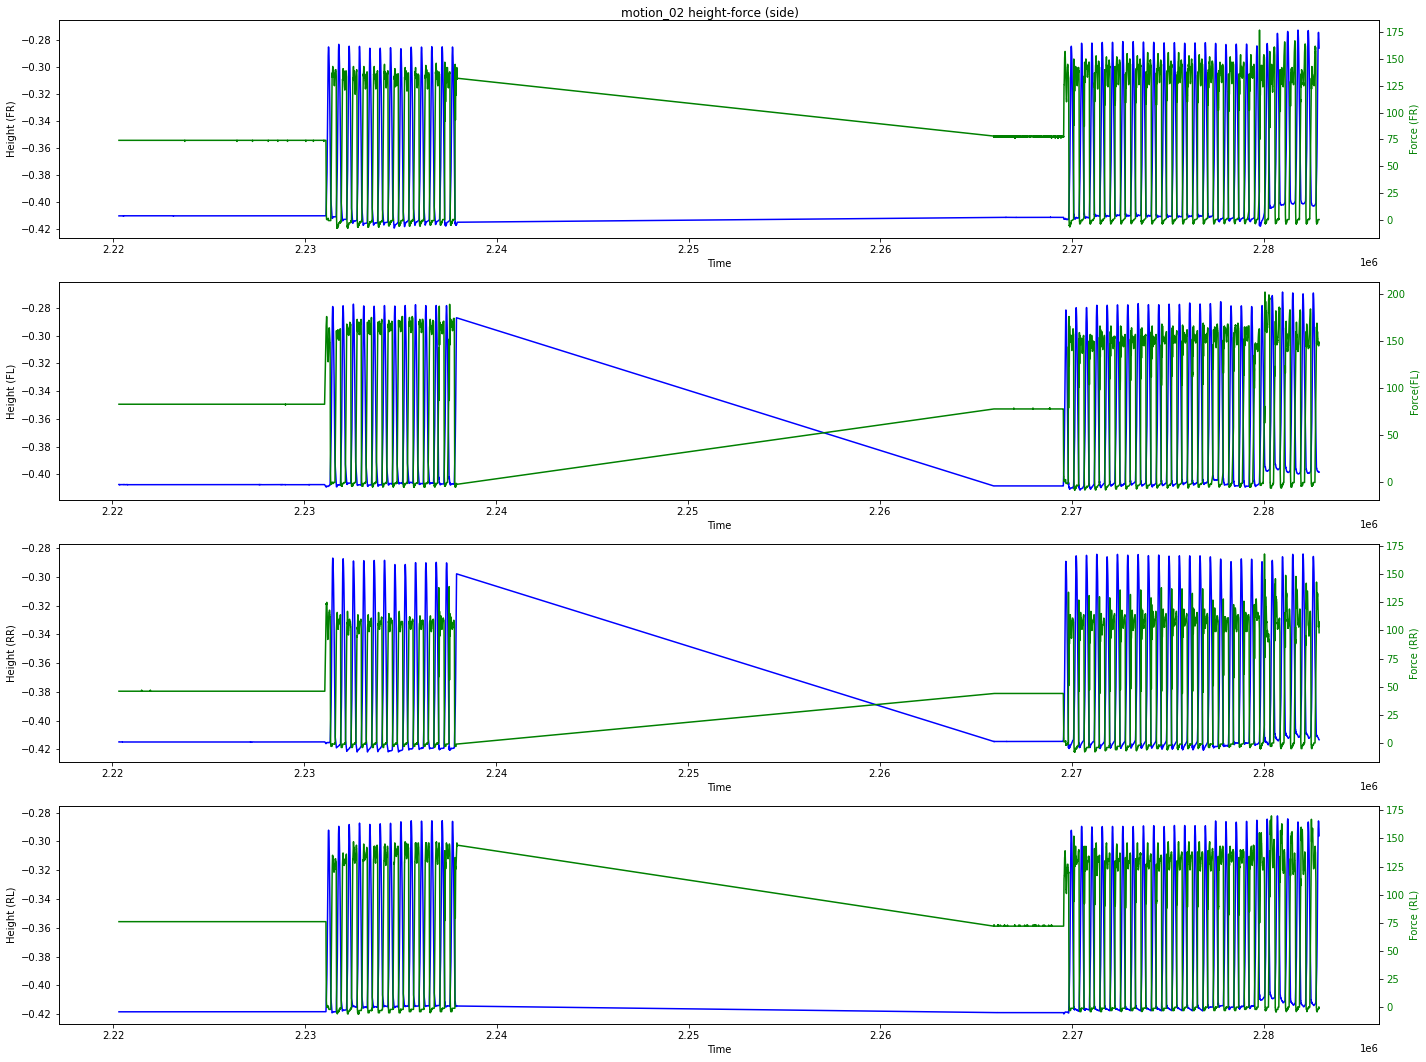

In [13]:
# Side (right)
side_cmds = get_specific_cmd(motion_02, 0, velocity, 0)
motion_02_side = motion_02[side_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_02_side)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_02 height-force (side)",
                      motion_02,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

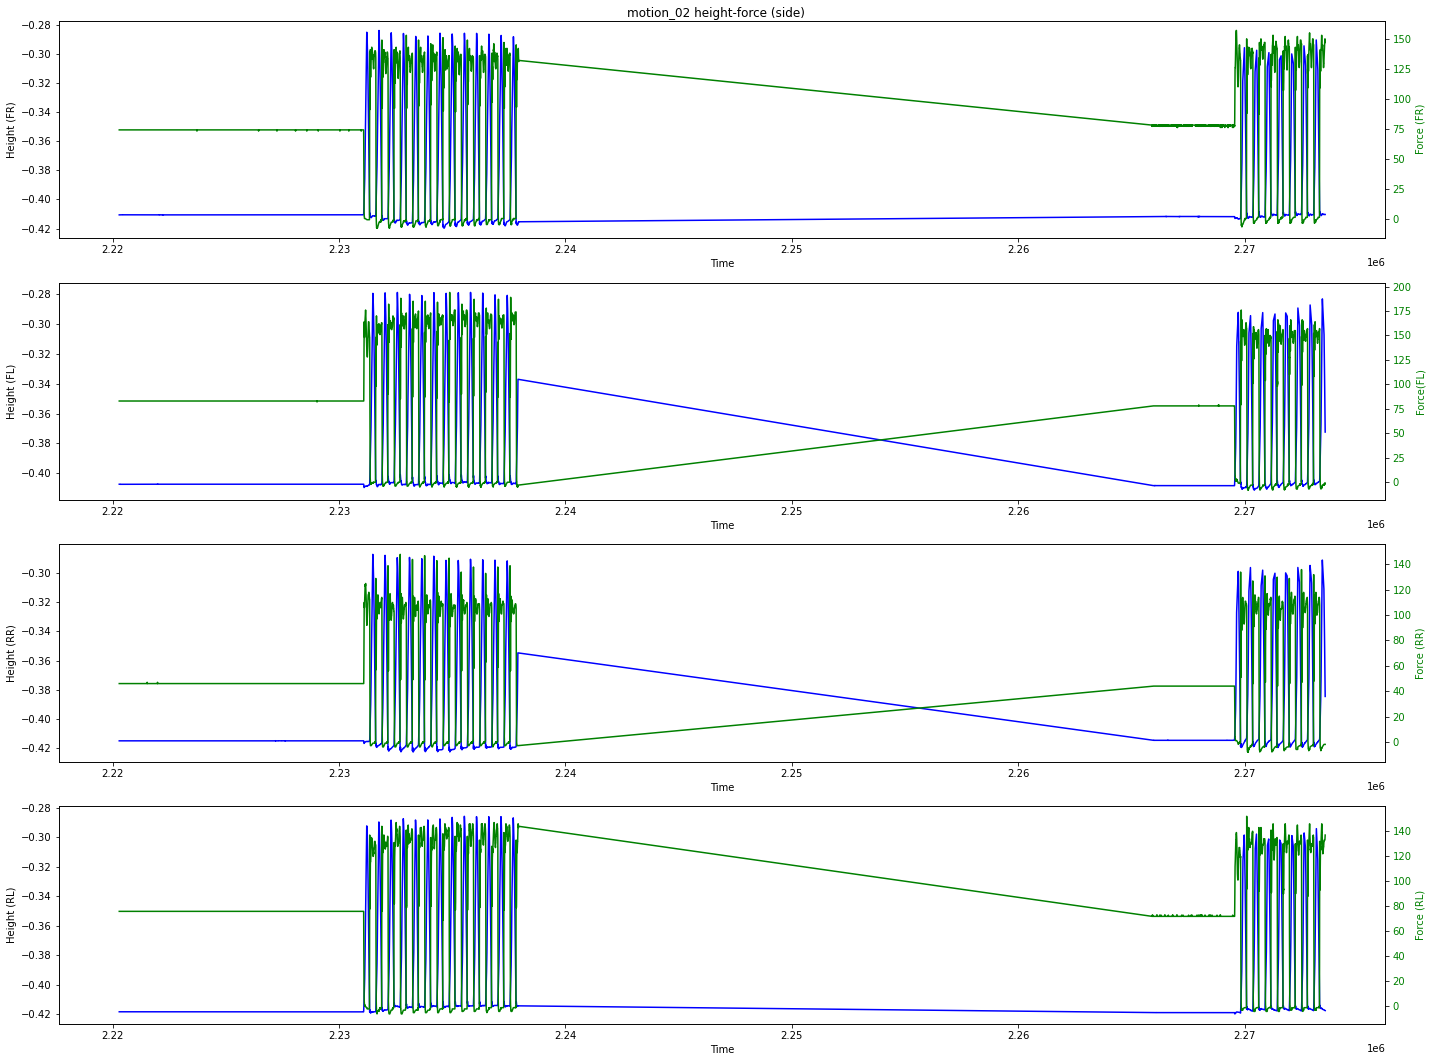

In [14]:
# Side (left)
side_cmds = get_specific_cmd(motion_02, 0, -velocity, 0)
motion_02_side = motion_02[side_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_02_side)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_02 height-force (side)",
                      motion_02,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

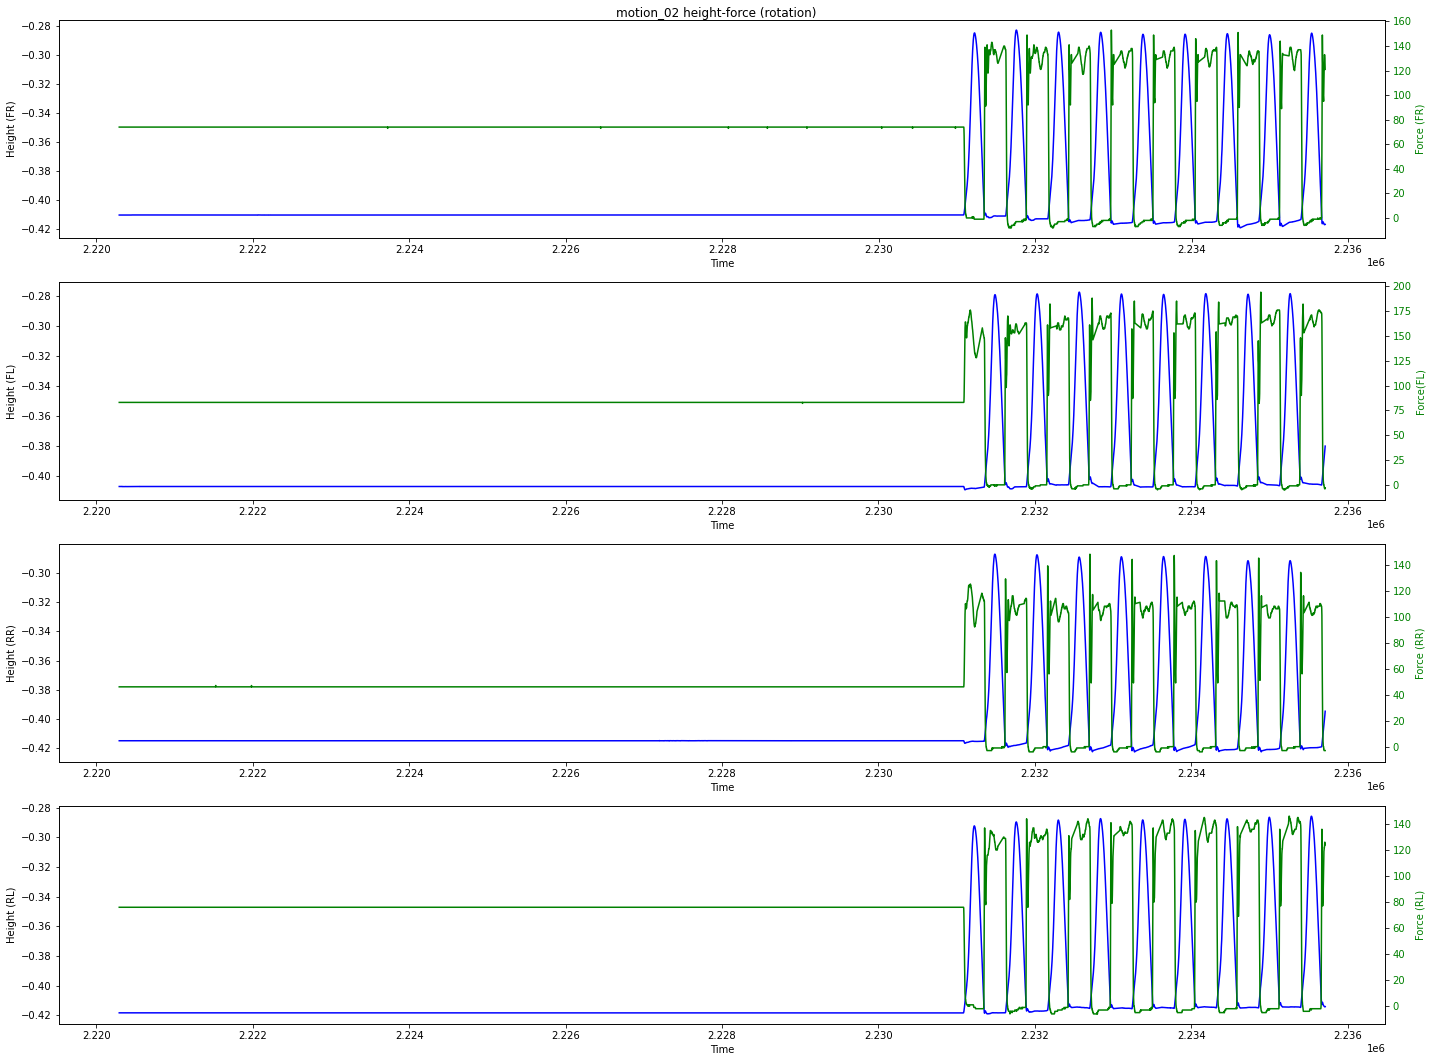

In [15]:
# Rotation (clockwise)
rot_cmds = get_specific_cmd(motion_02, 0, 0, velocity)
motion_02_rot = motion_02[rot_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_02_rot)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_02 height-force (rotation)",
                      motion_02,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

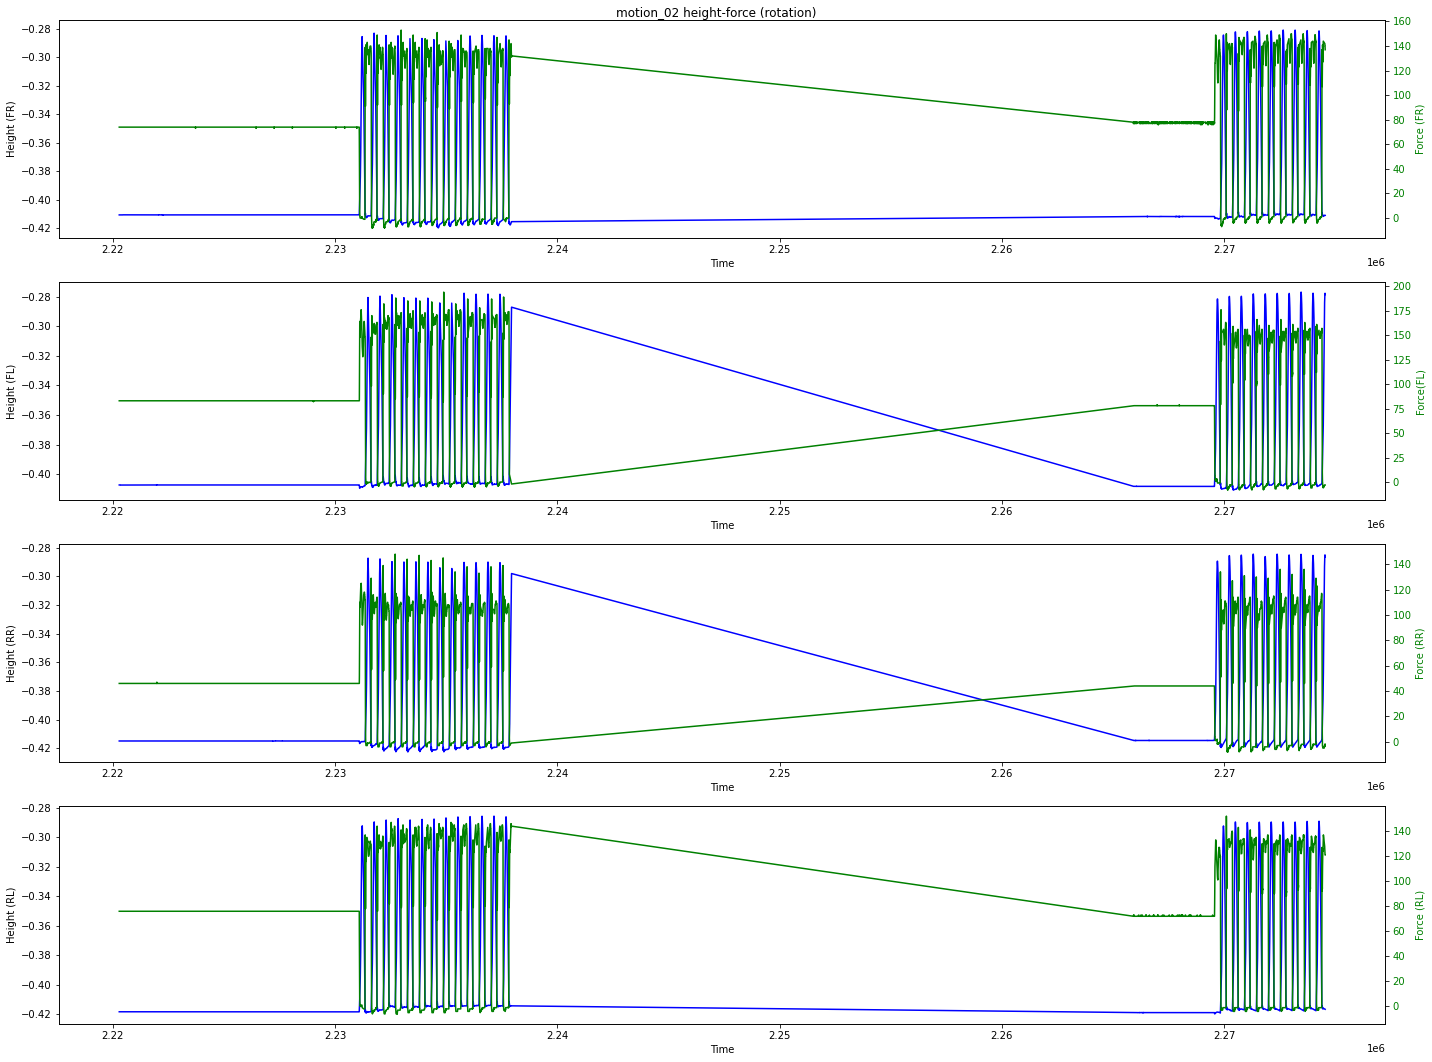

In [16]:
# Rotation (counter clockwise)
rot_cmds = get_specific_cmd(motion_02, 0, 0, -velocity)
motion_02_rot = motion_02[rot_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_02_rot)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_02 height-force (rotation)",
                      motion_02,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

## Footsteps Extraction (Height + Force)

In [17]:
def extract_footsteps(dataset, height_threshold=0.1, force_thresholds=[100,100,100,100]):
    # Compute height difference for FR and FL
    fr_fl_diff = np.round(abs(dataset[:, 34] - dataset[:, 37]), 9)

    # Compute height difference for RR and RL
    rr_rl_diff = np.round(abs(dataset[:, 40] - dataset[:, 43]), 9)

    # Compute compound difference for all foots
    height_diff = np.round(fr_fl_diff + rr_rl_diff, 9)
    print("Min and max diff between front and rear feet", min(height_diff), max(height_diff), "\n")
    
    # Find footsteps (based on height difference)
    footsteps_height = np.where(height_diff < height_threshold)[0]
    print("Amount of footsteps found with height criteria: ", len(footsteps_height), "\n")
    
    # Footsteps that belong to motion commands
    footsteps_due_to_motion = len(np.intersect1d(np.where(np.any(dataset[:, 2:5], axis=1))[0], footsteps_height))
    print("Intersection with motion commands: ", footsteps_due_to_motion, "\n")
    
    # Footsteps that belong to idle mode
    footsteps_due_to_stationarity = len(np.intersect1d(np.where(~np.any(dataset[:, 2:5], axis=1))[0], footsteps_height))
    print("Intersection with no motion commands: ", footsteps_due_to_stationarity, "\n")
    
    # FR min height (i.e swining motion)
    rear_force_footsteps = np.where(np.logical_and(dataset[:, 58] > force_thresholds[0], 
                                                   dataset[:, 59] > force_thresholds[1]))[0]
    front_force_footsteps = np.where(np.logical_and(dataset[:, 56] > force_thresholds[2], 
                                                    dataset[:, 57] > force_thresholds[3]))[0]

    # Find footsteps that match force constraints on all foot
    footsteps_force = np.intersect1d(rear_force_footsteps, front_force_footsteps)
    print("Number of force footsteps: ", len(footsteps_force), "\n")
    
    # Find force and height footsteps intersection
    force_height_footsteps = np.intersect1d(footsteps_force, footsteps_height)
    print("Number of height-force footsteps: ", len(force_height_footsteps), "\n")
    
    # Footsteps (from force and height) that belong to motion commands
    footsteps_due_to_motion = len(np.intersect1d(np.where(np.any(dataset[:, 2:5], axis=1))[0], force_height_footsteps))
    print("Number of footsteps extracted with height-force due to motion: ", footsteps_due_to_motion, "\n")
    
    # Footsteps (from force and height) that belong to motion commands
    footsteps_due_to_stationarity = len(np.intersect1d(np.where(~np.any(dataset[:, 2:5], axis=1))[0], force_height_footsteps))
    print("Number of footsteps extracted with height-force due to no motion: ", footsteps_due_to_stationarity, "\n")
    
    return force_height_footsteps

def footsteps_nms(dataset, footsteps):
    footsteps_nms = []

    footsteps_sort, timestamps_sort = zip(*sorted(zip(footsteps, dataset[footsteps, 0])))

    for idx, footstep_sort in enumerate(footsteps_sort):
        if idx > 0:
            if abs(dataset[footstep_sort, 0] - dataset[footsteps_sort[idx-1], 0]) < 9:
                continue
            else:
                footsteps_nms.append(footstep_sort)
        else:
            footsteps_nms.append(footstep_sort)

    return np.asarray(footsteps_nms)

## Footsteps

In [18]:
def footstep_extraction_and_plotting(dataset, velocities, height_threshold, force_thresholds, indexes):
    # Extract backward motion entries
    cmds = get_specific_cmd(dataset, velocities[0], velocities[1], velocities[2])
    motion_02_cmds = motion_02[cmds]
    fr_min_height, fl_min_height, rr_min_height, rl_min_height = get_swinging_motions(motion_02_cmds)
    print("Foot swinging motions lenghts: ", len(fr_min_height), len(fl_min_height), len(rr_min_height), len(rl_min_height))
    
    # Extract footsteps
    footsteps = extract_footsteps(motion_02_cmds, height_threshold, force_thresholds)
    print("Footsteps extracted: ", len(footsteps))
    
    # Footsteps NMS
    footsteps_after_nms = footsteps_nms(motion_02_cmds, footsteps)
    print("Footsteps after non-maximum-suppression: ", len(footsteps_after_nms))
    
    # Plot footsteps
    sample_walking_fr_height = fr_min_height[indexes]
    sample_walking_fl_height = fl_min_height[indexes]
    sample_walking_rr_height = rr_min_height[indexes]
    sample_walking_rl_height = rl_min_height[indexes]

    plot_overlapping_data("Footsteps",
                          motion_02_cmds,
                          [sample_walking_fr_height, 
                           sample_walking_fl_height, 
                           sample_walking_rr_height,
                           sample_walking_rl_height],
                           [34, 56, 37, 57, 40, 58, 43, 59],
                           True,
                           motion_02_cmds[footsteps_nms(motion_02_cmds, footsteps), 0])
    
    return motion_02_cmds, footsteps_after_nms

### Forward motion

Foot swinging motions lenghts:  18099 17822 18717 18848
Min and max diff between front and rear feet 0.000454 0.267628 

Amount of footsteps found with height criteria:  8723 

Intersection with motion commands:  8723 

Intersection with no motion commands:  0 

Number of force footsteps:  617 

Number of height-force footsteps:  617 

Number of footsteps extracted with height-force due to motion:  617 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  617
Footsteps after non-maximum-suppression:  159


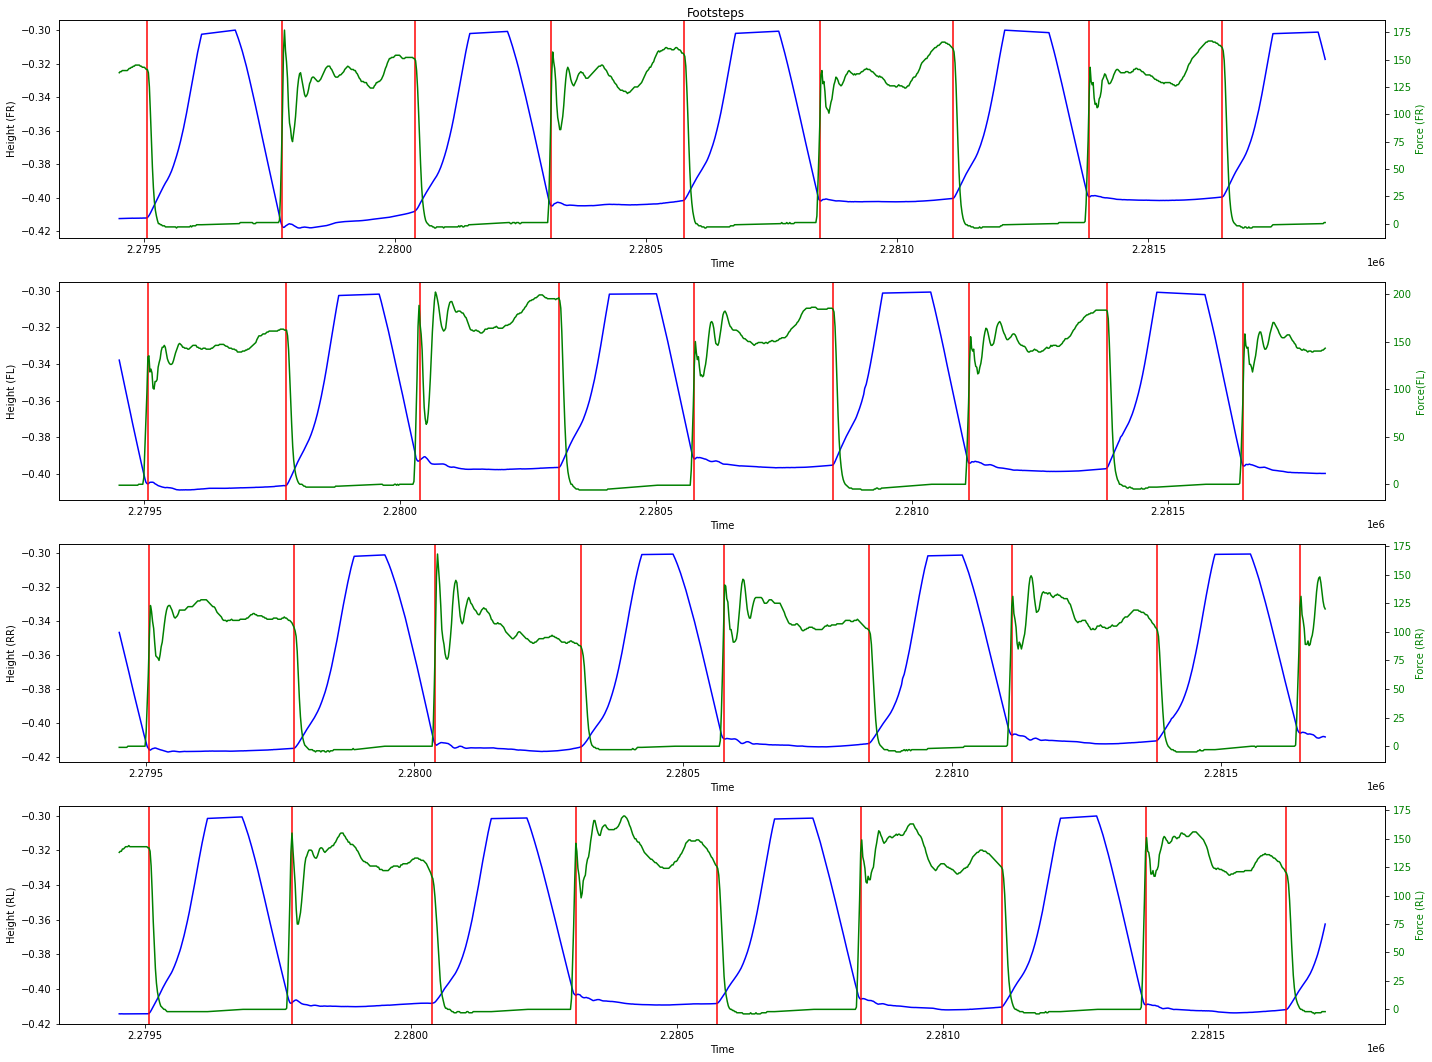

In [19]:
motion_02_fwd, footsteps_02_fwd = footstep_extraction_and_plotting(dataset=motion_02, velocities=[velocity, 0, 0], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 1000))

### Backward motion

Foot swinging motions lenghts:  17079 16768 17039 16927
Min and max diff between front and rear feet 0.000191 0.26773 

Amount of footsteps found with height criteria:  7765 

Intersection with motion commands:  7765 

Intersection with no motion commands:  0 

Number of force footsteps:  565 

Number of height-force footsteps:  565 

Number of footsteps extracted with height-force due to motion:  565 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  565
Footsteps after non-maximum-suppression:  143


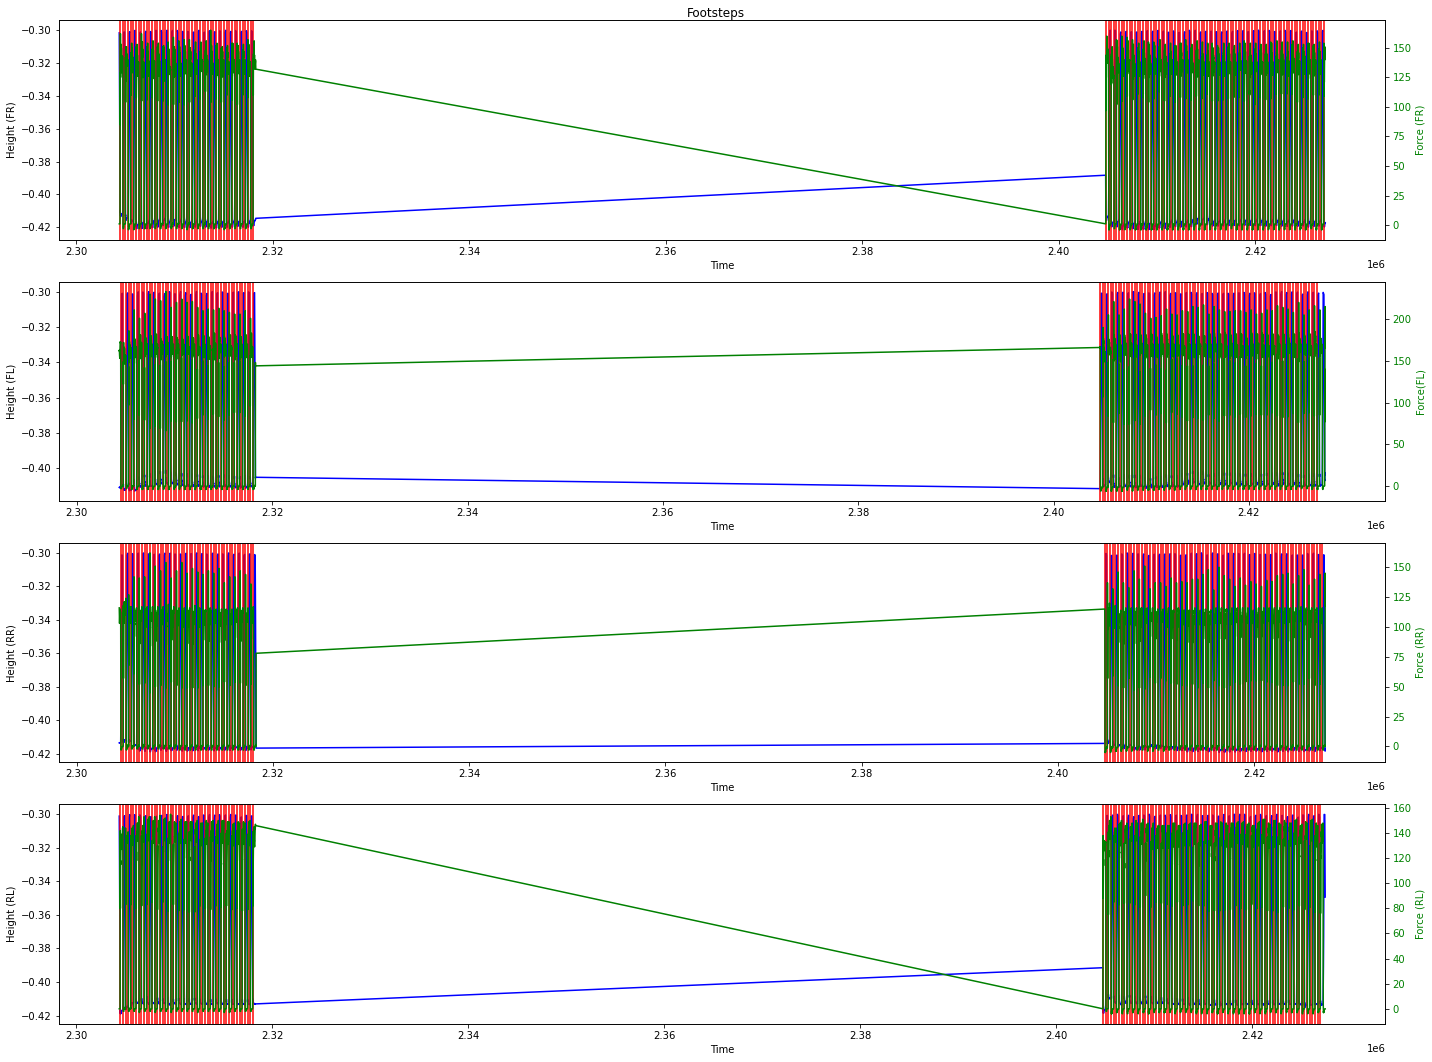

In [20]:
motion_02_bwd, footsteps_02_bwd = footstep_extraction_and_plotting(dataset=motion_02, velocities=[-velocity, 0, 0], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 16000))

### Side motion (right)

Foot swinging motions lenghts:  15208 14936 15457 15271
Min and max diff between front and rear feet 0.000637 0.265384 

Amount of footsteps found with height criteria:  6998 

Intersection with motion commands:  6998 

Intersection with no motion commands:  0 

Number of force footsteps:  491 

Number of height-force footsteps:  491 

Number of footsteps extracted with height-force due to motion:  491 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  491
Footsteps after non-maximum-suppression:  129


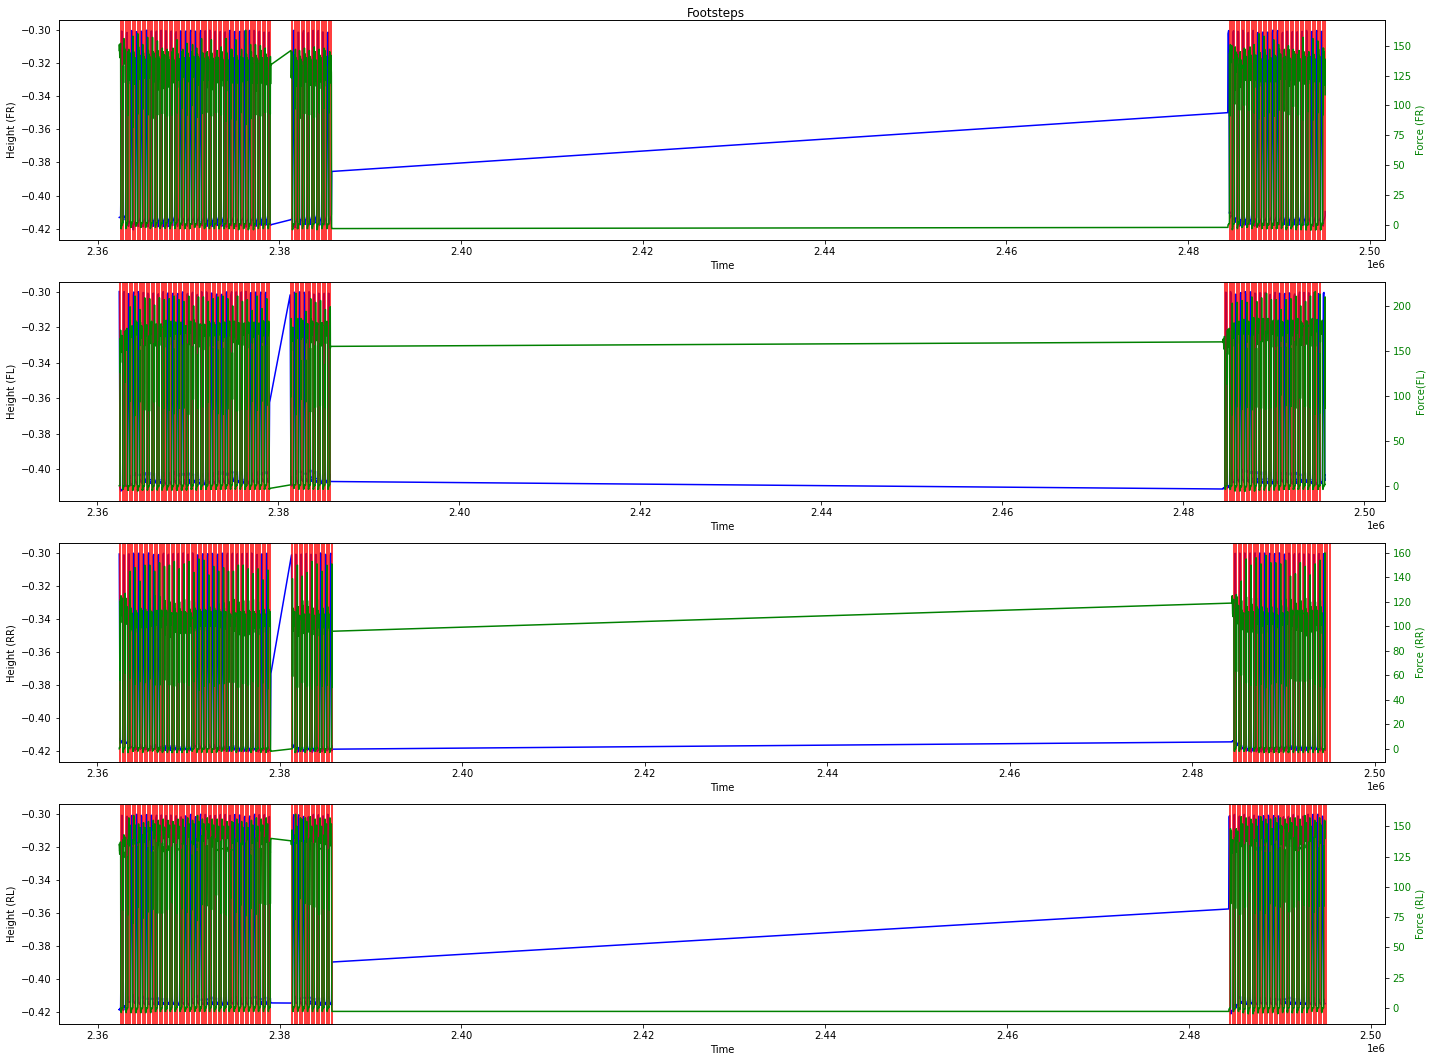

In [21]:
motion_02_side_right, footsteps_02_side_right = footstep_extraction_and_plotting(dataset=motion_02, velocities=[0, velocity, 0], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 14000))

### Side (left)

Foot swinging motions lenghts:  10960 11018 11035 11336
Min and max diff between front and rear feet 0.00273 0.266451 

Amount of footsteps found with height criteria:  5070 

Intersection with motion commands:  5070 

Intersection with no motion commands:  0 

Number of force footsteps:  357 

Number of height-force footsteps:  357 

Number of footsteps extracted with height-force due to motion:  357 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  357
Footsteps after non-maximum-suppression:  93


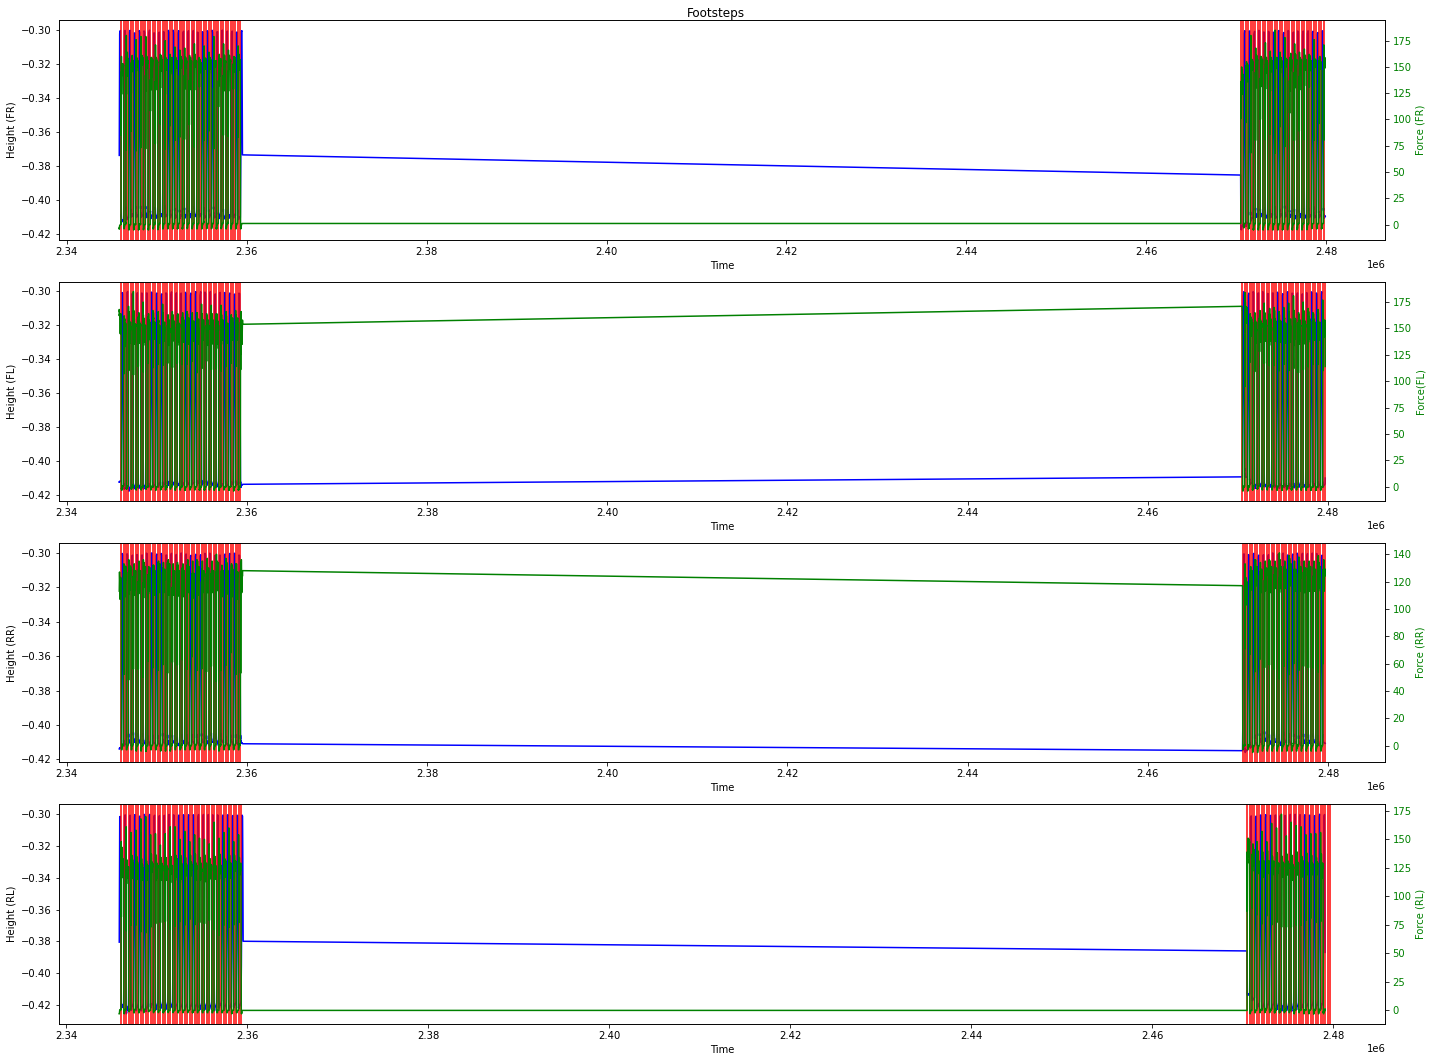

In [22]:
motion_02_side_left, footsteps_02_side_left = footstep_extraction_and_plotting(dataset=motion_02, velocities=[0, -velocity, 0], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 10000))

### Rotation (clockwise)

Foot swinging motions lenghts:  6686 6690 6761 6696
Min and max diff between front and rear feet 0.000135 0.265246 

Amount of footsteps found with height criteria:  3129 

Intersection with motion commands:  3129 

Intersection with no motion commands:  0 

Number of force footsteps:  202 

Number of height-force footsteps:  202 

Number of footsteps extracted with height-force due to motion:  202 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  202
Footsteps after non-maximum-suppression:  58


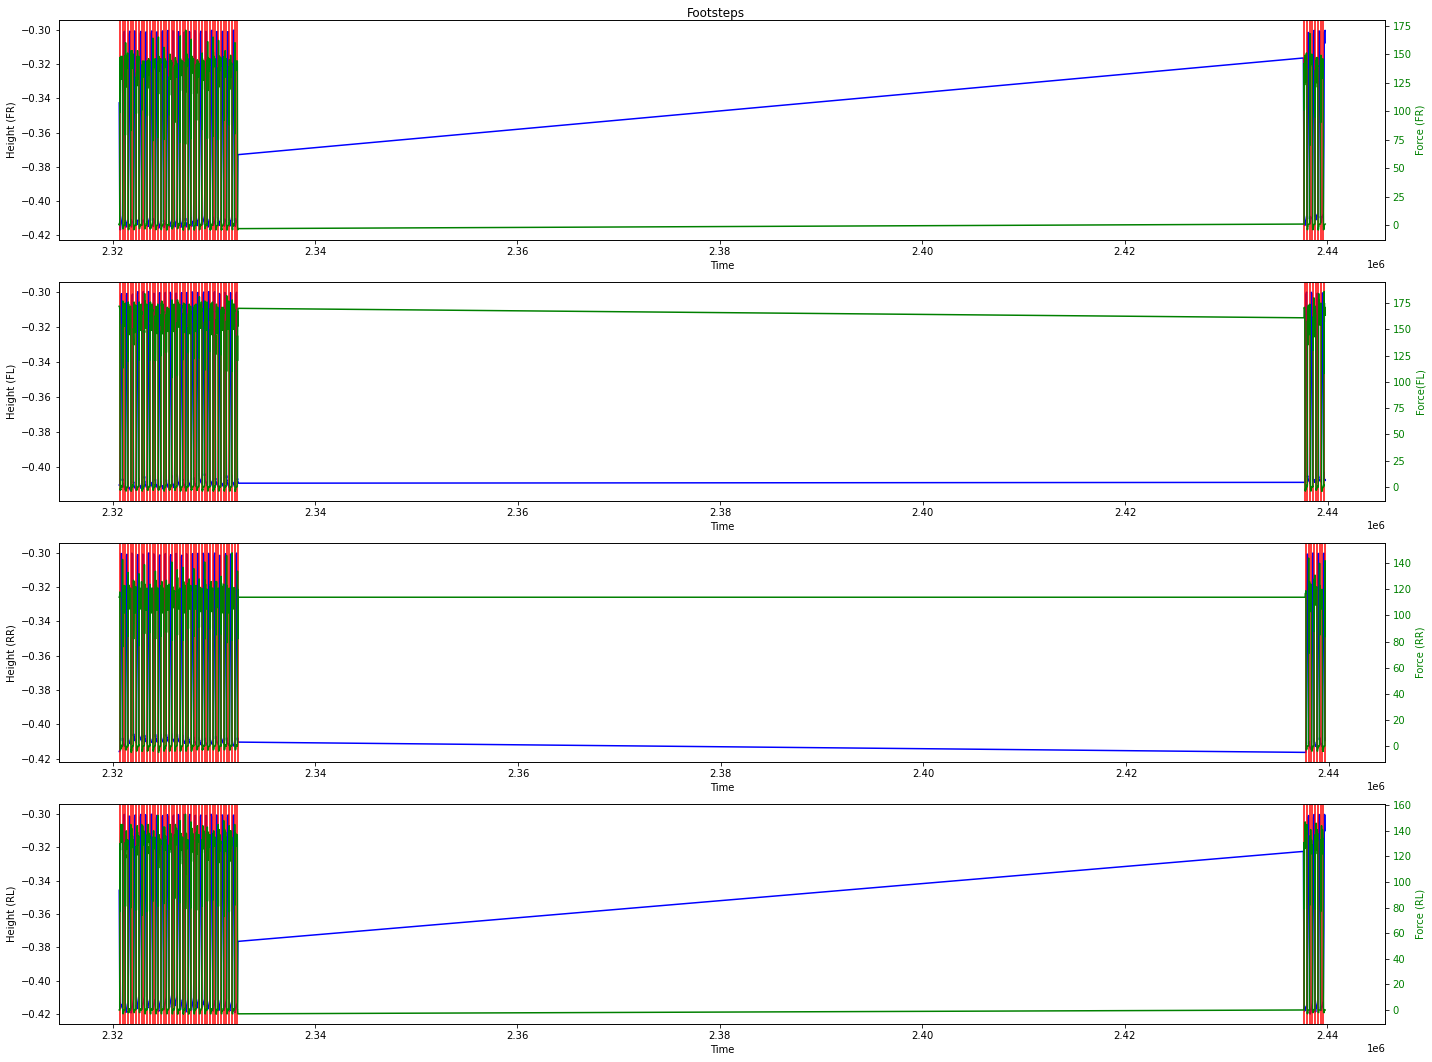

In [23]:
motion_02_clock, footsteps_02_clock = footstep_extraction_and_plotting(dataset=motion_02, velocities=[0, 0, velocity], height_threshold=0.1, force_thresholds=[90,90,90,90], indexes=range(0, 6000))

### Rotation (counter clockwise)

Foot swinging motions lenghts:  11425 11212 11483 11769
Min and max diff between front and rear feet 0.0002 0.267301 

Amount of footsteps found with height criteria:  5271 

Intersection with motion commands:  5271 

Intersection with no motion commands:  0 

Number of force footsteps:  377 

Number of height-force footsteps:  377 

Number of footsteps extracted with height-force due to motion:  377 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  377
Footsteps after non-maximum-suppression:  98


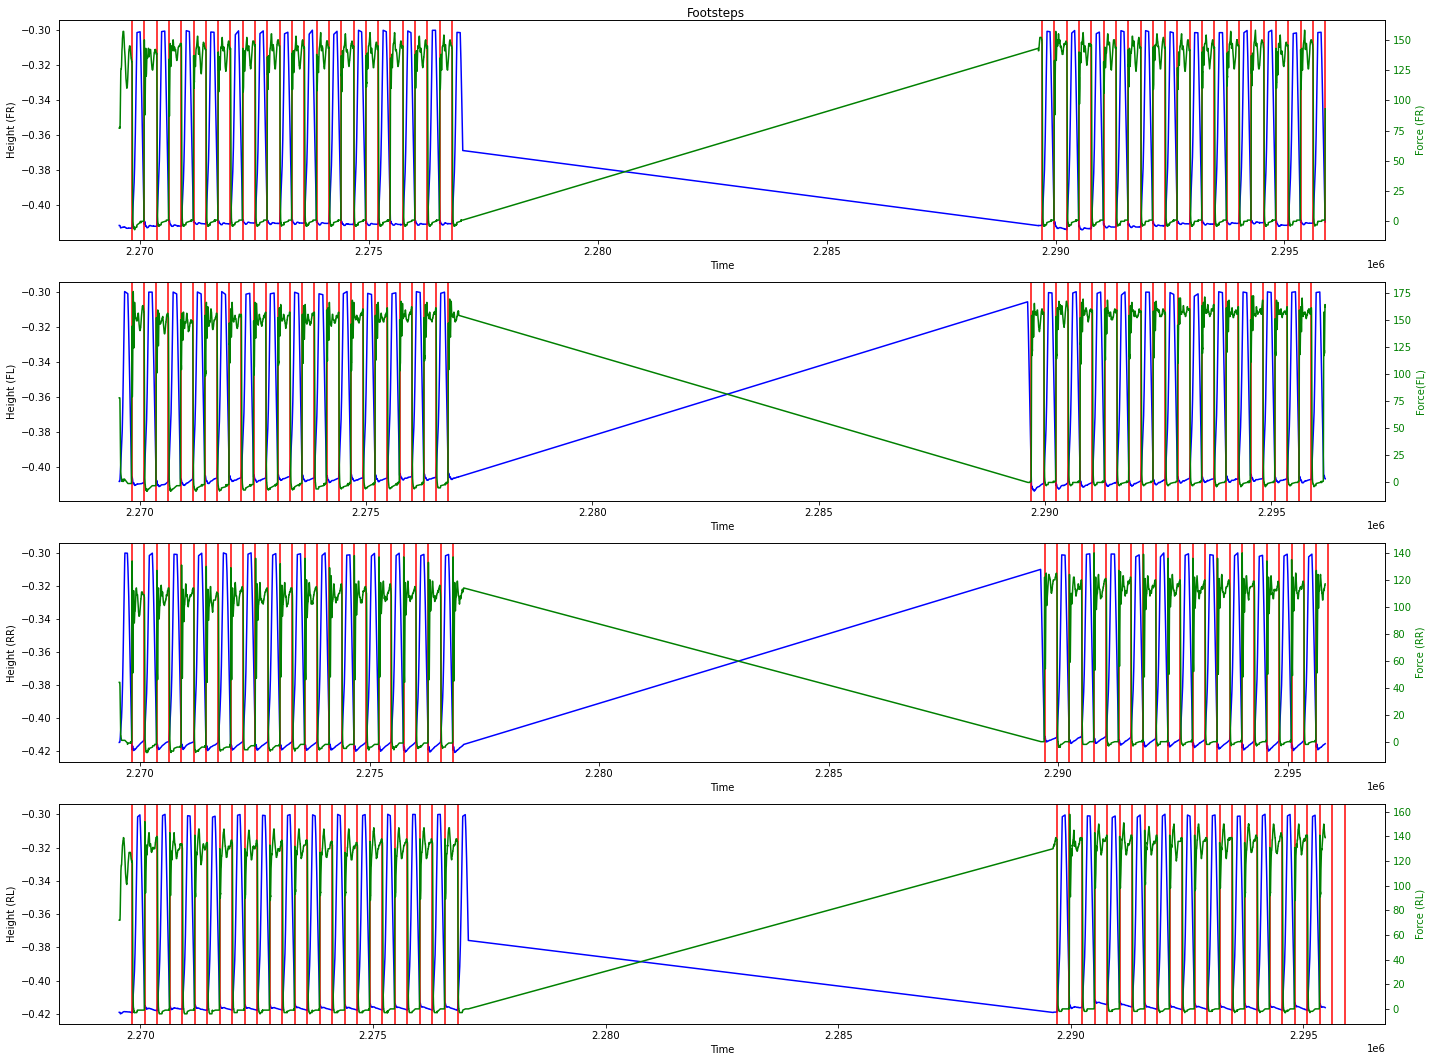

In [24]:
motion_02_count, footsteps_02_count = footstep_extraction_and_plotting(dataset=motion_02, velocities=[0, 0, -velocity], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 6000))

### Step size

In [25]:
def get_step_size(dataset, footsteps, idx_coord=[32,35,38,41]):
    # Footsteps sizes
    step_size_fr = []
    step_size_fl = []
    step_size_rr = []
    step_size_rl = []
    footstep_period = []
    
    # Compute step sizes
    for idx, footstep in enumerate(footsteps):
        if idx > 0:
            time_diff = dataset[footsteps[idx], 0] - dataset[footsteps[idx-1], 0]
            
            if time_diff < 300:
                footstep_period.append(time_diff)
                step_size_fr.append(dataset[footsteps[idx], idx_coord[0]] - dataset[footsteps[idx-1], idx_coord[0]])
                step_size_fl.append(dataset[footsteps[idx], idx_coord[1]] - dataset[footsteps[idx-1], idx_coord[1]])
                step_size_rr.append(dataset[footsteps[idx], idx_coord[2]] - dataset[footsteps[idx-1], idx_coord[2]])
                step_size_rl.append(dataset[footsteps[idx], idx_coord[3]] - dataset[footsteps[idx-1], idx_coord[3]])
    
    # Convert to numpy array
    step_size_fr_numpy = np.array(step_size_fr)
    step_size_fl_numpy = np.array(step_size_fl)
    step_size_rr_numpy = np.array(step_size_rr)
    step_size_rl_numpy = np.array(step_size_rl)
    footstep_period_numpy = np.array(footstep_period)
    
    # Only keep positive footsteps
    step_size_fr_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    step_size_fl_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    step_size_rr_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    step_size_rl_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    
    # Print average step-size
    print("Avg. step size time: ", np.mean(footstep_period_numpy))
    print("Avg. step size for FR foot: ", np.mean(step_size_fr_numpy))
    print("Avg. step size for FL foot: ", np.mean(step_size_fl_numpy))
    print("Avg. step size for RR foot: ", np.mean(step_size_rr_numpy))
    print("Avg. step size for RL foot: ", np.mean(step_size_rl_numpy), '\n')

    # Print std. dev. step-size
    print("Std. dev. step size for FR foot: ", np.std(step_size_fr_numpy))
    print("Std. dev. step size for FL foot: ", np.std(step_size_fl_numpy))
    print("Std. dev. step size for RR foot: ", np.std(step_size_rr_numpy))
    print("Std. dev. step size for RL foot: ", np.std(step_size_rl_numpy), '\n')
    
    return step_size_fr_numpy, step_size_fl_numpy, step_size_rr_numpy, step_size_rl_numpy

#### Forward motion

In [26]:
# Step size and velocity along x axis 
step_size_fr_x_fwd,_,_,_ = get_step_size(motion_02_fwd, footsteps_02_fwd)

Avg. step size time:  267.87417218543044
Avg. step size for FR foot:  0.08286165333333334
Avg. step size for FL foot:  0.08286165333333334
Avg. step size for RR foot:  0.08286165333333334
Avg. step size for RL foot:  0.08286165333333334 

Std. dev. step size for FR foot:  0.01550656833258589
Std. dev. step size for FL foot:  0.01550656833258589
Std. dev. step size for RR foot:  0.01550656833258589
Std. dev. step size for RL foot:  0.01550656833258589 



In [27]:
step_size_fr_x_fwd

array([0.003312, 0.109744, 0.083552, 0.086486, 0.088289, 0.088624,
       0.08685 , 0.083537, 0.084022, 0.08493 , 0.083898, 0.082956,
       0.084575, 0.082744, 0.08426 , 0.084034, 0.043769, 0.101168,
       0.087236, 0.085751, 0.082916, 0.08533 , 0.082384, 0.083192,
       0.094023, 0.08504 , 0.08487 , 0.082354, 0.082225, 0.084242,
       0.081303, 0.040091, 0.103106, 0.08558 , 0.083246, 0.067495,
       0.098612, 0.089515, 0.017975, 0.110506, 0.083016, 0.086681,
       0.087658, 0.086735, 0.1105  , 0.082243, 0.084751, 0.085183,
       0.082737, 0.083343, 0.083427, 0.083619, 0.083552, 0.084699,
       0.083749, 0.081582, 0.083778, 0.082585, 0.083319, 0.074491,
       0.094795, 0.087539, 0.085385, 0.085108, 0.08377 , 0.082889,
       0.083175, 0.083378, 0.083962, 0.08468 , 0.082699, 0.084388,
       0.083095, 0.083667, 0.084704])

In [28]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_02_fwd, footsteps_02_fwd, idx_coord=[33, 36, 39, 42])

Avg. step size time:  267.87417218543044
Avg. step size for FR foot:  0.0071869945205479445
Avg. step size for FL foot:  0.0071869945205479445
Avg. step size for RR foot:  0.0071869945205479445
Avg. step size for RL foot:  0.0071869945205479445 

Std. dev. step size for FR foot:  0.006753977522524376
Std. dev. step size for FL foot:  0.006753977522524376
Std. dev. step size for RR foot:  0.006753977522524376
Std. dev. step size for RL foot:  0.006753977522524376 



### Backward motion

In [29]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_02_bwd, footsteps_02_bwd)

Avg. step size time:  270.5390070921986
Avg. step size for FR foot:  0.02807030985915493
Avg. step size for FL foot:  0.02807030985915493
Avg. step size for RR foot:  0.02807030985915493
Avg. step size for RL foot:  0.02807030985915493 

Std. dev. step size for FR foot:  0.0034136302084089233
Std. dev. step size for FL foot:  0.0034136302084089233
Std. dev. step size for RR foot:  0.0034136302084089233
Std. dev. step size for RL foot:  0.0034136302084089233 



In [30]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_02_bwd, footsteps_02_bwd, idx_coord=[33, 36, 39, 42])

Avg. step size time:  270.5390070921986
Avg. step size for FR foot:  0.025953314285714284
Avg. step size for FL foot:  0.025953314285714284
Avg. step size for RR foot:  0.025953314285714284
Avg. step size for RL foot:  0.025953314285714284 

Std. dev. step size for FR foot:  0.005047754670693714
Std. dev. step size for FL foot:  0.005047754670693714
Std. dev. step size for RR foot:  0.005047754670693714
Std. dev. step size for RL foot:  0.005047754670693714 



### Side motion (right)

In [31]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_02_side_right, footsteps_02_side_right)

Avg. step size time:  269.6825396825397
Avg. step size for FR foot:  0.0010322499999999984
Avg. step size for FL foot:  0.0010322499999999984
Avg. step size for RR foot:  0.0010322499999999984
Avg. step size for RL foot:  0.0010322499999999984 

Std. dev. step size for FR foot:  0.001099435423296884
Std. dev. step size for FL foot:  0.001099435423296884
Std. dev. step size for RR foot:  0.001099435423296884
Std. dev. step size for RL foot:  0.001099435423296884 



In [32]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_02_side_right, footsteps_02_side_right, idx_coord=[33, 36, 39, 42])

Avg. step size time:  269.6825396825397
Avg. step size for FR foot:  0.028362031746031746
Avg. step size for FL foot:  0.028362031746031746
Avg. step size for RR foot:  0.028362031746031746
Avg. step size for RL foot:  0.028362031746031746 

Std. dev. step size for FR foot:  0.005774632994504015
Std. dev. step size for FL foot:  0.005774632994504015
Std. dev. step size for RR foot:  0.005774632994504015
Std. dev. step size for RL foot:  0.005774632994504015 



### Side motions (left)

In [33]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_02_side_left, footsteps_02_side_left)

Avg. step size time:  270.25274725274727
Avg. step size for FR foot:  0.013875711111111112
Avg. step size for FL foot:  0.013875711111111112
Avg. step size for RR foot:  0.013875711111111112
Avg. step size for RL foot:  0.013875711111111112 

Std. dev. step size for FR foot:  0.0021403824022016085
Std. dev. step size for FL foot:  0.0021403824022016085
Std. dev. step size for RR foot:  0.0021403824022016085
Std. dev. step size for RL foot:  0.0021403824022016085 



In [34]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_02_side_left, footsteps_02_side_left, idx_coord=[33, 36, 39, 42])

Avg. step size time:  270.25274725274727
Avg. step size for FR foot:  0.015637777777777775
Avg. step size for FL foot:  0.015637777777777775
Avg. step size for RR foot:  0.015637777777777775
Avg. step size for RL foot:  0.015637777777777775 

Std. dev. step size for FR foot:  0.0031305045165907494
Std. dev. step size for FL foot:  0.0031305045165907494
Std. dev. step size for RR foot:  0.0031305045165907494
Std. dev. step size for RL foot:  0.0031305045165907494 



### Rotation (clockwise)

In [35]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_02_clock, footsteps_02_clock)

Avg. step size time:  269.89285714285717
Avg. step size for FR foot:  0.01713803703703703
Avg. step size for FL foot:  0.01713803703703703
Avg. step size for RR foot:  0.01713803703703703
Avg. step size for RL foot:  0.01713803703703703 

Std. dev. step size for FR foot:  0.0015495056435421576
Std. dev. step size for FL foot:  0.0015495056435421576
Std. dev. step size for RR foot:  0.0015495056435421576
Std. dev. step size for RL foot:  0.0015495056435421576 



In [36]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_02_clock, footsteps_02_clock, idx_coord=[33, 36, 39, 42])

Avg. step size time:  269.89285714285717
Avg. step size for FR foot:  0.01744855555555556
Avg. step size for FL foot:  0.01744855555555556
Avg. step size for RR foot:  0.01744855555555556
Avg. step size for RL foot:  0.01744855555555556 

Std. dev. step size for FR foot:  0.00734061259595891
Std. dev. step size for FL foot:  0.00734061259595891
Std. dev. step size for RR foot:  0.00734061259595891
Std. dev. step size for RL foot:  0.00734061259595891 



### Rotation (counter clockwise)

In [37]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_02_count, footsteps_02_count)

Avg. step size time:  269.0537634408602
Avg. step size for FR foot:  0.0032269999999999994
Avg. step size for FL foot:  0.0032269999999999994
Avg. step size for RR foot:  0.0032269999999999994
Avg. step size for RL foot:  0.0032269999999999994 

Std. dev. step size for FR foot:  0.0014920086845905474
Std. dev. step size for FL foot:  0.0014920086845905474
Std. dev. step size for RR foot:  0.0014920086845905474
Std. dev. step size for RL foot:  0.0014920086845905474 



In [38]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_02_count, footsteps_02_count, idx_coord=[33, 36, 39, 42])

Avg. step size time:  269.0537634408602
Avg. step size for FR foot:  0.007351437499999998
Avg. step size for FL foot:  0.007351437499999998
Avg. step size for RR foot:  0.007351437499999998
Avg. step size for RL foot:  0.007351437499999998 

Std. dev. step size for FR foot:  0.004351701247339223
Std. dev. step size for FL foot:  0.004351701247339223
Std. dev. step size for RR foot:  0.004351701247339223
Std. dev. step size for RL foot:  0.004351701247339223 



### Footstep visualization

In [39]:
def visualize_static_foosteps(dataset, footsteps):
    old_xs = None
    old_ys = None
    old_zs = None
    
    # Visualize footsteps
    for idx, footstep in enumerate(footsteps):
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')

        #ax.set_xlim([-0.5, 0.5])
        #ax.set_ylim([-0.3, 0.3])
        ax.set_zlim([-0.5, 0.5])

        dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)
        
        time_diff = dataset[footsteps[idx], 0] - dataset[footsteps[idx-1], 0]
            
        #if time_diff < 300:
        # 3D positions
        xs = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
        ys = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
        zs = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])    

        ax.scatter(xs, ys, zs, marker='o')

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

        plt.show()

        #print(xs, ys, zs, dataset[footstep, 2:5], dataset[footstep, 25:28])
        if idx > 0 and idx < len(footsteps):
            print(f'Diff: {time_diff}. Command: {dataset[footstep, 2:5]}. State: {dataset[footstep, 25:28]}. Coord: {[xs[0], ys[0], zs[0]]}. Step size: {[xs[0]-old_xs[0], ys[0]-old_ys[0], zs[0]-old_zs[0]]}.')
        else:
            print(f'Command: {dataset[footstep, 2:5]}. State: {dataset[footstep, 25:28]}. Coord: {[xs[0], ys[0], zs[0]]}.')
            
        old_xs = xs
        old_ys = ys
        old_zs = zs

In [40]:
def update_points(num, dataset, footsteps, x, y, z, points):    
    # Starting footstep index
    footstep = footsteps[num]
    
    # Round footsteps position
    dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    new_x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    new_y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    new_z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    # update properties
    points.set_data(new_x, new_y)
    points.set_3d_properties(new_z, 'z')

    # return modified artists
    return points

def visualize_animated_footsteps(dataset, footsteps, style: str):
    # Create figure
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # Setting the axes properties
    ax.set_xlim3d([-0.4, 0.4])
    ax.set_xlabel('X')

    ax.set_ylim3d([-0.2, 0.2])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-0.5, 0.5])
    ax.set_zlabel('Z')

    # Starting footstep index
    footstep = footsteps[0]

    # Round footsteps position
    dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    txt = fig.suptitle('')
    points, = ax.plot(x, y, z, style)
    
    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, update_points, frames=len(footsteps), fargs=(dataset, footsteps, x, y, z, points))
    
    return anim   

In [41]:
def update_prediction_points(dataset, num, x, y, z, points):  
    # Starting footstep index
    footstep = footsteps[num]
    
    # Round footsteps position
    D[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    new_x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    new_y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    new_z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    # update properties
    points.set_data(new_x, new_y)
    points.set_3d_properties(new_z, 'z')

    # return modified artists
    return points

def visualize_predicted_animated_footsteps(dataset, footsteps, style: str):
    # Create figure
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # Setting the axes properties
    ax.set_xlim3d([-0.4, 0.4])
    ax.set_xlabel('X')

    ax.set_ylim3d([-0.2, 0.2])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-0.5, 0.5])
    ax.set_zlabel('Z')

    # Starting footstep index
    footstep = footsteps[0]

    # Round footsteps position
    D[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    txt = fig.suptitle('')
    points, = ax.plot(x, y, z, style)
    
    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, update_points, frames=len(footsteps), fargs=(dataset, x, y, z, points))
    
    return anim   

In [42]:
def visualize_absolute_foostep_sizes(dataset, footsteps):    
    # Visualize footsteps
    for idx, footstep in enumerate(footsteps):
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')

        #ax.set_xlim([-0.5, 0.5])
        #ax.set_ylim([-0.3, 0.3])
        ax.set_zlim([-0.5, 0.5])

        dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)
                    
        # 3D positions
        xs = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
        ys = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
        zs = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])    

        ax.scatter(xs, ys, zs, marker='o')

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

        plt.show()
        
        if idx < (len(footsteps) - 1):
            time_diff = abs(dataset[footsteps[idx], 0] - dataset[footsteps[idx+1], 0])
        
            print("Time diff: ", time_diff)

            if time_diff < 300:
                
                # Find closest timestamp with gap of 100 (to know which foot is moving)
                absolute_val_array = np.abs(motion_02_cmds[:, 0] - (motion_02_cmds[footstep, 0] + 100))
                idx_height_check = absolute_val_array.argmin()
                
                fr_moving = np.abs(motion_02_cmds[footstep, 34] - motion_02_cmds[idx_height_check, 34])
                fl_moving = np.abs(motion_02_cmds[footstep, 37] - motion_02_cmds[idx_height_check, 37])
                rr_moving = np.abs(motion_02_cmds[footstep, 40] - motion_02_cmds[idx_height_check, 40])
                rl_moving = np.abs(motion_02_cmds[footstep, 43] - motion_02_cmds[idx_height_check, 43])
                
                print("Footstep timestamp: ", motion_02_cmds[footstep, 0])
                print("Height check index: ", idx_height_check)
                print("Height check timestamp: ", motion_02_cmds[idx_height_check, 0])

                print(f'\nFL moving: {fl_moving}. FR moving: {fr_moving}')
                print(f'RL moving: {rl_moving}. RR moving: {rr_moving}')

                print(f'\nFL moving: {fl_moving > 0.06}. FR moving: {fr_moving > 0.06}')
                print(f'RL moving: {rl_moving > 0.06}. RR moving: {rr_moving > 0.06}')
                
                print(f'\nFR before: {motion_02_cmds[footstep, 34]}. FR later: {motion_02_cmds[idx_height_check, 34]}')
                print(f'RR moving: {motion_02_cmds[footstep, 37]}. RL moving: {motion_02_cmds[idx_height_check, 37]}')

                assert (fr_moving > 0.06) == (rl_moving > 0.06)
                assert (rr_moving > 0.06) == (fl_moving > 0.06)
                assert (fr_moving > 0.06) != (fl_moving > 0.06)
                
                # Compute front feet movements
                fr_movement = abs(abs(dataset[footstep, 32]) - abs(dataset[footsteps[idx+1], 32]))
                fl_movement = abs(abs(dataset[footstep, 35]) - abs(dataset[footsteps[idx+1], 35]))
                rr_movement = abs(abs(dataset[footstep, 38]) - abs(dataset[footsteps[idx+1], 38]))
                rl_movement = abs(abs(dataset[footstep, 41]) - abs(dataset[footsteps[idx+1], 41]))
                
                print(f'\nCoord FR: {[xs[0], ys[0], zs[0]]}. Coord FL: {[xs[1], ys[1], zs[1]]}. Coord RR: {[xs[2], ys[2], zs[2]]}. Coord RL: {[xs[3], ys[3], zs[3]]}')
                
                if fr_moving:
                    print(f'\nFR step_size: {fr_movement + fl_movement}. FL step_size: {0}. RR step size: {0}. RL step_size: {rl_movement + rr_movement}.')
                elif fl_moving:
                    print(f'\nFR step_size: {0}. FL step_size: {fl_movement + fr_movement}. RR step size: {rl_movement + rr_movement}. RL step_size: {0}.')
                else:
                    print("\nERROR")

cmds = get_specific_cmd(motion_02, velocity, 0, 0)
motion_02_cmds = motion_02[cmds]
visualize_absolute_foostep_sizes(motion_02_fwd, footsteps_02_fwd)

KeyboardInterrupt: 

### Forward motion

In [ ]:
step_size_fr_x_fwd

In [ ]:
anim = visualize_animated_footsteps(motion_02_fwd, footsteps_02_fwd, "bo")
HTML(anim.to_html5_video())

### Backward motion

In [ ]:
anim = visualize_animated_footsteps(motion_02_bwd, footsteps_02_bwd, "bo")
HTML(anim.to_html5_video())

### Side motion (right)

In [ ]:
anim = visualize_animated_footsteps(motion_02_side_right, footsteps_02_side_right, "bo")
HTML(anim.to_html5_video())

### Side motion (left)

In [ ]:
anim = visualize_animated_footsteps(motion_02_side_left, footsteps_02_side_left, "bo")
HTML(anim.to_html5_video())

### Rotation (clockwise)

In [ ]:
anim = visualize_animated_footsteps(motion_02_clock, footsteps_02_clock, "bo")
HTML(anim.to_html5_video())

### Rotation (counter clockwise)

In [ ]:
anim = visualize_animated_footsteps(motion_02_count, footsteps_02_count, "bo")
HTML(anim.to_html5_video())

# Multivariate Linear Regression (FR foot prediction)

The input will use initially only:

- **HighCmd: fwd, side, rot speeds**
- **HighState: fwd, side, rot speeds, footPosition2Body (FR)**

and as output we seek to predict the following:

- **footPosition2Body (FR)**

In [43]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [44]:
def plot_target_and_predictions(title: str, predictions, target):
    fig, ax1 = plt.subplots(1,1, figsize=(15,10))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(range(predictions.shape[0]), predictions, 'b-')
    ax1.set_ylabel('Predictions')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(range(predictions.shape[0]), target, 'g-')
    ax2.set_ylabel('Target', color='g')

    for tl in ax2.get_yticklabels():
        tl.set_color('g')
    
    fig.tight_layout()
    plt.show()

In [45]:
def create_timestamp_consistent_dataset(dataset, footsteps):
    # Footsteps sizes
    inputs = []
    labels = []
        
    # Compute step sizes
    for idx, footstep in enumerate(footsteps):
        if idx > 0:
            time_diff = dataset[footsteps[idx], 0] - dataset[footsteps[idx-1], 0]
            
            if time_diff < 300:
                inputs.append(dataset[footsteps[idx-1], 2:5].tolist() + dataset[footsteps[idx-1], 25:28].tolist() + dataset[footsteps[idx-1], 32:44].tolist())
                labels.append(dataset[footsteps[idx], 32:44])
            else:
                continue
                    
    # Convert to numpy array
    inputs_numpy = np.array(inputs)
    labels_numpy = np.array(labels)
    
    return inputs_numpy, labels_numpy

X_motion_02_fwd_3D, Y_motion_02_fwd_3D = create_timestamp_consistent_dataset(motion_02_fwd, footsteps_02_fwd)
X_motion_02_bwd_3D, Y_motion_02_bwd_3D = create_timestamp_consistent_dataset(motion_02_bwd, footsteps_02_bwd)
X_motion_02_clock_3D, Y_motion_02_clock_3D = create_timestamp_consistent_dataset(motion_02_clock, footsteps_02_clock)
X_motion_02_count_3D, Y_motion_02_count_3D = create_timestamp_consistent_dataset(motion_02_count, footsteps_02_count)
X_motion_02_side_left_3D, Y_motion_02_side_left_3D = create_timestamp_consistent_dataset(motion_02_side_left, footsteps_02_side_left)
X_motion_02_side_right_3D, Y_motion_02_side_right_3D = create_timestamp_consistent_dataset(motion_02_side_right, footsteps_02_side_right)

# Stack datasets
X_motion_02_3D = np.concatenate((X_motion_02_fwd_3D, X_motion_02_bwd_3D, X_motion_02_side_right_3D, X_motion_02_side_left_3D, X_motion_02_clock_3D, X_motion_02_count_3D))
Y_motion_02_3D = np.concatenate((Y_motion_02_fwd_3D, Y_motion_02_bwd_3D, Y_motion_02_side_right_3D, Y_motion_02_side_left_3D, Y_motion_02_clock_3D, Y_motion_02_count_3D))

In [49]:
%store X_motion_02_3D
%store Y_motion_02_3D

Stored 'X_motion_02_3D' (ndarray)
Stored 'Y_motion_02_3D' (ndarray)


In [46]:
def create_timestamp_consistent_dataset_with_step_size_labels(dataset, footsteps, threshold=0.04):
    # Footsteps sizes
    inputs = []
    labels = []
            
    # Compute step sizes
    for idx, footstep in enumerate(footsteps):
        if idx < (len(footsteps) - 1):
            time_diff = abs(dataset[footsteps[idx], 0] - dataset[footsteps[idx+1], 0])
            
            if time_diff < 300:
                # Input (command, state, x/y/z position for each foot)
                #inputs.append(dataset[footsteps[idx-1], 2:5].tolist() + dataset[footsteps[idx-1], 25:28].tolist() + dataset[footsteps[idx-1], 32:44].tolist())
                
                # Find closest timestamp with gap of 100 (to know which foot is moving)
                absolute_val_array = np.abs(dataset[:, 0] - (dataset[footstep, 0] + 100))
                idx_height_check = absolute_val_array.argmin()
                
                fr_moving = np.abs(dataset[footstep, 34] - dataset[idx_height_check, 34]) > threshold
                fl_moving = np.abs(dataset[footstep, 37] - dataset[idx_height_check, 37]) > threshold
                rr_moving = np.abs(dataset[footstep, 40] - dataset[idx_height_check, 40]) > threshold
                rl_moving = np.abs(dataset[footstep, 43] - dataset[idx_height_check, 43]) > threshold

                assert fr_moving == rl_moving
                assert rr_moving == fl_moving
                assert fr_moving != fl_moving
                
                # Compute FR movement
                fr_movement_x = abs(abs(dataset[footstep, 32]) - abs(dataset[footsteps[idx+1], 32]))
                fr_movement_y = abs(abs(dataset[footstep, 33]) - abs(dataset[footsteps[idx+1], 33]))
                
                # Compute FL movement
                fl_movement_x = abs(abs(dataset[footstep, 35]) - abs(dataset[footsteps[idx+1], 35]))
                fl_movement_y = abs(abs(dataset[footstep, 36]) - abs(dataset[footsteps[idx+1], 36]))
                
                # Compute RR movement
                rr_movement_x = abs(abs(dataset[footstep, 38]) - abs(dataset[footsteps[idx+1], 38]))
                rr_movement_y = abs(abs(dataset[footstep, 39]) - abs(dataset[footsteps[idx+1], 39]))
                
                # Compute RL movement
                rl_movement_x = abs(abs(dataset[footstep, 41]) - abs(dataset[footsteps[idx+1], 41]))
                rl_movement_y = abs(abs(dataset[footstep, 42]) - abs(dataset[footsteps[idx+1], 42]))
                
                label = []
                                
                if fr_moving:
                    label.append([fr_movement_x + fl_movement_x, fr_movement_y + fl_movement_y, 0, 0, 0, 0, rr_movement_x + rl_movement_x, rr_movement_y + rl_movement_y])
                elif fl_moving:
                    label.append([0, 0, fr_movement_x + fl_movement_x, fr_movement_y + fl_movement_y, rr_movement_x + rl_movement_x, rr_movement_y + rl_movement_y, 0, 0])
                else:
                    print("\nERROR")
                    
                labels.append(label)
                inputs.append(dataset[footsteps[idx-1], 2:5].tolist() + dataset[footsteps[idx-1], 25:28].tolist() + [int(fr_moving), int(fl_moving), int(rr_moving), int(rl_moving)])
                
            else:
                continue
                    
    # Convert to numpy array
    inputs_numpy = np.array(inputs)
    labels_numpy = np.array(labels)
    
    return inputs_numpy, labels_numpy.reshape(labels_numpy.shape[0], labels_numpy.shape[2])

X_motion_02_fwd_step, Y_motion_02_fwd_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_02_fwd, footsteps_02_fwd)
X_motion_02_bwd_step, Y_motion_02_bwd_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_02_bwd, footsteps_02_bwd)
X_motion_02_clock_step, Y_motion_02_clock_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_02_clock, footsteps_02_clock)
X_motion_02_count_step, Y_motion_02_count_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_02_count, footsteps_02_count)
X_motion_02_side_left_step, Y_motion_02_side_left_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_02_side_left, footsteps_02_side_left)
X_motion_02_side_right_step, Y_motion_02_side_right_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_02_side_right, footsteps_02_side_right)

# Stack datasets
X_motion_02_step = np.concatenate((X_motion_02_fwd_step, X_motion_02_bwd_step, X_motion_02_side_right_step, X_motion_02_side_left_step, X_motion_02_clock_step, X_motion_02_count_step))
Y_motion_02_step = np.concatenate((Y_motion_02_fwd_step, Y_motion_02_bwd_step, Y_motion_02_side_right_step, Y_motion_02_side_left_step, Y_motion_02_clock_step, Y_motion_02_count_step))

In [47]:
%store X_motion_02_step
%store Y_motion_02_step

Stored 'X_motion_02_step' (ndarray)
Stored 'Y_motion_02_step' (ndarray)


In [48]:
def labels_stats(dataset, title):
    print(f'Statistics for {title} motion\n')
    
    # Find all positive movements in x and y for FR
    fr_steps_x = np.where(dataset[:, 0] > 0)[0]
    fr_steps_y = np.where(dataset[:, 1] > 0)[0]
    
    # Find all positive movements in x and y for FR
    fl_steps_x = np.where(dataset[:, 2] > 0)[0]
    fl_steps_y = np.where(dataset[:, 3] > 0)[0]
    
    # Find all positive movements in x and y for FR
    rr_steps_x = np.where(dataset[:, 4] > 0)[0]
    rr_steps_y = np.where(dataset[:, 5] > 0)[0]
    
    # Find all positive movements in x and y for FR
    rl_steps_x = np.where(dataset[:, 6] > 0)[0]
    rl_steps_y = np.where(dataset[:, 7] > 0)[0]
    
    # Compute stats for FR foot
    print(f'FR mean x step: {np.mean(dataset[fr_steps_x, 0])}. FR std x step: {np.std(dataset[fr_steps_x, 0])}. FR mean y step: {np.mean(dataset[fr_steps_y, 1])}. FR std y step: {np.mean(dataset[fr_steps_y, 1])}')
 
    # Compute stats for FL foot
    print(f'FL mean x step: {np.mean(dataset[fl_steps_x, 2])}. FL std x step: {np.std(dataset[fl_steps_x, 2])}. FL mean y step: {np.mean(dataset[fl_steps_y, 3])}. FL std y step: {np.mean(dataset[fl_steps_y, 3])}')
    
    # Compute stats for RR foot
    print(f'RR mean x step: {np.mean(dataset[rr_steps_x, 4])}. RR std x step: {np.std(dataset[rr_steps_x, 4])}. RR mean y step: {np.mean(dataset[rr_steps_y, 5])}. RR std y step: {np.mean(dataset[rr_steps_y, 5])}')
    
    # Compute stats for RL foot
    print(f'RL mean x step: {np.mean(dataset[rl_steps_x, 6])}. RL std x step: {np.std(dataset[rl_steps_x, 6])}. RL mean y step: {np.mean(dataset[rl_steps_y, 7])}. RL std y step: {np.mean(dataset[rl_steps_y, 7])}\n')
    
labels_stats(Y_motion_02_fwd_step, "forward")
labels_stats(Y_motion_02_bwd_step, "backward")
labels_stats(Y_motion_02_clock_step, "clockwise")
labels_stats(Y_motion_02_count_step, "counter clockwise")
labels_stats(Y_motion_02_side_left_step, "left step")
labels_stats(Y_motion_02_side_right_step, "right step")

Statistics for forward motion

FR mean x step: 0.16403809333333336. FR std x step: 0.02427141047634622. FR mean y step: 0.011815981333333333. FR std y step: 0.011815981333333333
FL mean x step: 0.16405434210526318. FL std x step: 0.024715344999856094. FL mean y step: 0.011653849999999999. FL std y step: 0.011653849999999999
RR mean x step: 0.16434459210526314. RR std x step: 0.025635003641801983. RR mean y step: 0.01023203947368421. RR std y step: 0.01023203947368421
RL mean x step: 0.16430588000000002. RL std x step: 0.024242286206247136. RL mean y step: 0.009000440000000004. RL std y step: 0.009000440000000004

Statistics for backward motion

FR mean x step: 0.04945774285714287. FR std x step: 0.00400232054718872. FR mean y step: 0.039521657142857144. FR std y step: 0.039521657142857144
FL mean x step: 0.048406873239436626. FL std x step: 0.006636167517623402. FL mean y step: 0.039060845070422526. FL std y step: 0.039060845070422526
RR mean x step: 0.05415559154929578. RR std x step: